# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env_file_name = "Tennis_Windows_x86_64/Tennis.exe"
# env = UnityEnvironment(file_name=env_file_name)
env = UnityEnvironment(file_name=env_file_name,no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('states shape : ',states.shape)
print('Both states look like : ',states)
print(2*states)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
states shape :  (2, 24)
Both states look like :  [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.65278625 -1.5
  -0.          0.          6.83172083  6.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.4669857  -1.5
   0.          0.         -6.83172083  6.          0.          0.

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
if False:
    total_scores = []
    for i in range(100):                                        # play game for 5 episodes
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        t = 0
        while True:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            # print('actions : ',actions)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            t += 1
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        print('Score (max over agents) from episode {}: {}, and {} steps taken'.format(i, np.max(scores),t))
        print(scores)
        total_scores.append(scores)
    print('Average Random Score : ', np.mean(total_scores))
        
def plot_results(results):
    import matplotlib.pyplot as plt
    import torch
    plt.ion()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.all_rewards)), results.all_rewards)
    plt.plot(np.arange(len(results.avg_rewards)), results.avg_rewards)
    plt.ylabel('Rewards')
    plt.xlabel('Episode #')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.critic_loss)), results.critic_loss)
    plt.ylabel('critic_losses')
    plt.xlabel('Learn Step #')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.actor_loss)), results.actor_loss)
    plt.ylabel('actor_losses')
    plt.xlabel('Learn Step #')
    plt.show()


When finished, you can close the environment.

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.4
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
Running on device :  cpu
Episode 0 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.066 seconds, mem : 15


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.959 || 0.696 seconds, mem : 299


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.921 || 0.578 seconds, mem : 583


Episode 60 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.885 || 0.359 seconds, mem : 867


Episode 75 with 31 steps || Reward : [0.   0.09] || avg reward :  0.001 || Noise  0.859 || 0.098 seconds, mem : 1096
Episode 80 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.850 || 0.322 seconds, mem : 1167


Episode 94 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.002 || Noise  0.827 || 0.107 seconds, mem : 1383
Episode 97 with 31 steps || Reward : [0.   0.09] || avg reward :  0.003 || Noise  0.822 || 0.108 seconds, mem : 1442
Episode 100 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.817 || 0.384 seconds, mem : 1485


Episode 120 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.003 || Noise  0.785 || 0.323 seconds, mem : 1769


Episode 125 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.004 || Noise  0.777 || 0.095 seconds, mem : 1856


Episode 136 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.005 || Noise  0.760 || 0.086 seconds, mem : 2027
Episode 138 with 30 steps || Reward : [0.   0.09] || avg reward :  0.006 || Noise  0.757 || 0.088 seconds, mem : 2071
Episode 140 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.006 || Noise  0.754 || 0.314 seconds, mem : 2099
Episode 142 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.007 || Noise  0.751 || 0.098 seconds, mem : 2144


Episode 145 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.008 || Noise  0.747 || 0.091 seconds, mem : 2204
Episode 152 with 31 steps || Reward : [0.   0.09] || avg reward :  0.009 || Noise  0.736 || 0.091 seconds, mem : 2333
Episode 155 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.732 || 0.104 seconds, mem : 2394


Episode 160 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.010 || Noise  0.724 || 0.343 seconds, mem : 2465


Episode 170 with 30 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.710 || 0.368 seconds, mem : 2623
Episode 173 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.706 || 0.088 seconds, mem : 2681


Episode 174 with 30 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.704 || 0.094 seconds, mem : 2711
Episode 177 with 29 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.700 || 0.089 seconds, mem : 2768
Episode 179 with 32 steps || Reward : [0.1  0.09] || avg reward :  0.013 || Noise  0.697 || 0.092 seconds, mem : 2815
Episode 180 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.013 || Noise  0.696 || 0.328 seconds, mem : 2829


Episode 184 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.690 || 0.097 seconds, mem : 2903
Episode 186 with 33 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.688 || 0.102 seconds, mem : 2951


Episode 200 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.013 || Noise  0.669 || 0.322 seconds, mem : 3150


Episode 204 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.663 || 0.096 seconds, mem : 3223
Episode 206 with 30 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.661 || 0.086 seconds, mem : 3268
Episode 210 with 32 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.655 || 0.371 seconds, mem : 3342


Episode 217 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.646 || 0.092 seconds, mem : 3458
Episode 218 with 29 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.645 || 0.099 seconds, mem : 3487
Episode 220 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.018 || Noise  0.642 || 0.313 seconds, mem : 3516
Episode 221 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.641 || 0.089 seconds, mem : 3545


Episode 223 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.639 || 0.092 seconds, mem : 3590
Episode 228 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.632 || 0.095 seconds, mem : 3678
Episode 230 with 29 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.630 || 0.359 seconds, mem : 3722


Episode 233 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.626 || 0.100 seconds, mem : 3800
Episode 240 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.020 || Noise  0.617 || 0.314 seconds, mem : 3900
Episode 241 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.616 || 0.099 seconds, mem : 3933


Episode 257 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.597 || 0.103 seconds, mem : 4176
Episode 260 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.593 || 0.366 seconds, mem : 4244


Episode 271 with 25 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.580 || 0.074 seconds, mem : 4420
Episode 272 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.579 || 0.091 seconds, mem : 4450


Episode 275 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.575 || 0.089 seconds, mem : 4509
Episode 277 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.573 || 0.082 seconds, mem : 4550
Episode 280 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.018 || Noise  0.570 || 0.302 seconds, mem : 4592
Episode 281 with 29 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.569 || 0.086 seconds, mem : 4621
Episode 283 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.566 || 0.106 seconds, mem : 4669
Episode 284 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.020 || Noise  0.565 || 0.098 seconds, mem : 4702


Episode 294 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.554 || 0.091 seconds, mem : 4877
Episode 295 with 29 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.553 || 0.088 seconds, mem : 4906
Episode 296 with 29 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.552 || 0.084 seconds, mem : 4935
Episode 298 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.550 || 0.091 seconds, mem : 4981
Episode 299 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.024 || Noise  0.548 || 0.093 seconds, mem : 5013
Episode 300 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.547 || 0.358 seconds, mem : 5044


Episode 310 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.537 || 0.367 seconds, mem : 5203
Episode 313 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.533 || 0.096 seconds, mem : 5264


Episode 318 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.528 || 0.108 seconds, mem : 5354
Episode 320 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.023 || Noise  0.526 || 0.316 seconds, mem : 5382
Episode 322 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.524 || 0.101 seconds, mem : 5433


Episode 327 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.519 || 0.097 seconds, mem : 5522
Episode 329 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.517 || 0.091 seconds, mem : 5567


Episode 334 with 32 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.511 || 0.096 seconds, mem : 5658
Episode 337 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.508 || 0.107 seconds, mem : 5721
Episode 340 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.023 || Noise  0.505 || 0.319 seconds, mem : 5763
Episode 342 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.503 || 0.092 seconds, mem : 5808


Episode 345 with 33 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.500 || 0.097 seconds, mem : 5869
Episode 346 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.499 || 0.097 seconds, mem : 5902
Episode 348 with 38 steps || Reward : [0.1  0.09] || avg reward :  0.026 || Noise  0.497 || 0.113 seconds, mem : 5954
Episode 350 with 32 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.495 || 0.435 seconds, mem : 6009
Episode 351 with 30 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.494 || 0.093 seconds, mem : 6039


Episode 358 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.487 || 0.096 seconds, mem : 6156
Episode 360 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.027 || Noise  0.485 || 0.319 seconds, mem : 6185


Episode 370 with 30 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.476 || 0.361 seconds, mem : 6346
Episode 372 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.474 || 0.093 seconds, mem : 6392


Episode 374 with 32 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.472 || 0.105 seconds, mem : 6439
Episode 375 with 29 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.471 || 0.085 seconds, mem : 6468
Episode 380 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.026 || Noise  0.466 || 0.316 seconds, mem : 6556


Episode 384 with 42 steps || Reward : [0.1  0.09] || avg reward :  0.025 || Noise  0.463 || 0.137 seconds, mem : 6640
Episode 391 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.456 || 0.118 seconds, mem : 6758
Episode 392 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.455 || 0.094 seconds, mem : 6790


Episode 395 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.453 || 0.103 seconds, mem : 6851
Episode 398 with 34 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.450 || 0.106 seconds, mem : 6917
Episode 399 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.449 || 0.095 seconds, mem : 6949
Episode 400 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.024 || Noise  0.448 || 0.315 seconds, mem : 6964
Episode 402 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.446 || 0.096 seconds, mem : 7010


Episode 405 with 37 steps || Reward : [0.1  0.09] || avg reward :  0.026 || Noise  0.444 || 0.111 seconds, mem : 7076
Episode 409 with 30 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.440 || 0.098 seconds, mem : 7159
Episode 411 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.438 || 0.118 seconds, mem : 7206


Episode 413 with 34 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.437 || 0.173 seconds, mem : 7254
Episode 417 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.433 || 0.112 seconds, mem : 7330
Episode 420 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.027 || Noise  0.430 || 0.397 seconds, mem : 7372
Episode 421 with 32 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.430 || 0.102 seconds, mem : 7404


Episode 425 with 33 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.426 || 0.133 seconds, mem : 7487
Episode 429 with 38 steps || Reward : [0.1  0.09] || avg reward :  0.027 || Noise  0.423 || 0.120 seconds, mem : 7568
Episode 432 with 30 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.420 || 0.102 seconds, mem : 7631
Episode 433 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.419 || 0.121 seconds, mem : 7664


Episode 434 with 31 steps || Reward : [0.   0.09] || avg reward :  0.029 || Noise  0.419 || 0.129 seconds, mem : 7695


Episode 440 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.414 || 0.745 seconds, mem : 7798
Episode 447 with 45 steps || Reward : [0.09 0.1 ] || avg reward :  0.027 || Noise  0.408 || 0.155 seconds, mem : 7928


Episode 456 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.401 || 0.101 seconds, mem : 8091


Episode 460 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.397 || 0.385 seconds, mem : 8164
Episode 462 with 49 steps || Reward : [0.2        0.39000001] || avg reward :  0.029 || Noise  0.396 || 0.425 seconds, mem : 8227
Episode 464 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.394 || 0.166 seconds, mem : 8274
Episode 465 with 31 steps || Reward : [0.   0.09] || avg reward :  0.031 || Noise  0.393 || 0.154 seconds, mem : 8305


Episode 466 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.393 || 0.144 seconds, mem : 8332
Episode 468 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.033 || Noise  0.391 || 0.113 seconds, mem : 8375


Episode 476 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.385 || 0.129 seconds, mem : 8507
Episode 477 with 68 steps || Reward : [0.1  0.19] || avg reward :  0.032 || Noise  0.384 || 0.241 seconds, mem : 8575
Episode 478 with 31 steps || Reward : [0.   0.09] || avg reward :  0.033 || Noise  0.383 || 0.109 seconds, mem : 8606
Episode 480 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.033 || Noise  0.382 || 0.417 seconds, mem : 8634


Episode 488 with 42 steps || Reward : [0.1  0.09] || avg reward :  0.033 || Noise  0.376 || 0.161 seconds, mem : 8776
Episode 489 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.375 || 0.112 seconds, mem : 8805


Episode 500 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.029 || Noise  0.367 || 0.479 seconds, mem : 8970


Episode 520 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.023 || Noise  0.352 || 0.421 seconds, mem : 9255
Episode 522 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.351 || 0.151 seconds, mem : 9302
Episode 527 with 29 steps || Reward : [0.09 0.1 ] || avg reward :  0.023 || Noise  0.347 || 0.113 seconds, mem : 9388


Episode 534 with 45 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.343 || 0.178 seconds, mem : 9518
Episode 536 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.341 || 0.137 seconds, mem : 9559


Episode 540 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.021 || Noise  0.339 || 0.515 seconds, mem : 9616


Episode 560 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.018 || Noise  0.325 || 0.507 seconds, mem : 9900


Episode 580 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.006 || Noise  0.312 || 0.592 seconds, mem : 10184


Episode 600 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.004 || Noise  0.300 || 0.521 seconds, mem : 10468


Episode 620 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.004 || Noise  0.288 || 0.470 seconds, mem : 10752


Episode 640 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.277 || 0.479 seconds, mem : 11036


Episode 660 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.266 || 0.462 seconds, mem : 11320


Episode 680 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.256 || 0.481 seconds, mem : 11604


Episode 700 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.246 || 0.610 seconds, mem : 11888


Episode 720 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.236 || 0.618 seconds, mem : 12172


Episode 740 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.227 || 0.532 seconds, mem : 12456


Episode 760 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.218 || 0.505 seconds, mem : 12740


Episode 780 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.209 || 0.511 seconds, mem : 13024


Episode 800 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.201 || 0.500 seconds, mem : 13308


Episode 820 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.193 || 0.507 seconds, mem : 13592


Episode 840 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.186 || 0.565 seconds, mem : 13876


Episode 860 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.178 || 0.502 seconds, mem : 14160


Episode 880 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.171 || 0.554 seconds, mem : 14444


Episode 900 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.165 || 0.530 seconds, mem : 14728


Episode 920 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.158 || 0.616 seconds, mem : 15012


Episode 940 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.152 || 0.648 seconds, mem : 15296


Episode 960 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.146 || 0.530 seconds, mem : 15580


Episode 980 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.140 || 0.504 seconds, mem : 15864


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.4
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


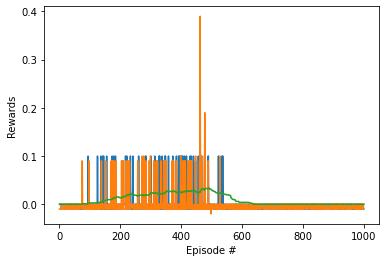

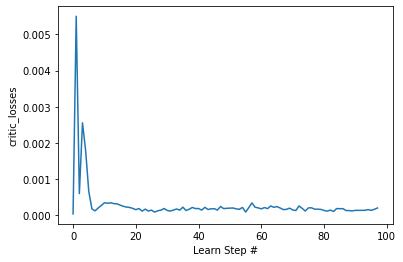

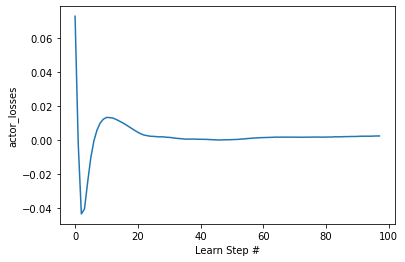

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.4
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001
Running on device :  cpu


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 0 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.087 seconds, mem : 15


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.959 || 0.356 seconds, mem : 299


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.921 || 0.894 seconds, mem : 583


Episode 60 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.885 || 0.602 seconds, mem : 867


Episode 80 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.850 || 0.579 seconds, mem : 1151


Episode 91 with 30 steps || Reward : [0.   0.09] || avg reward :  0.001 || Noise  0.832 || 0.158 seconds, mem : 1323


Episode 100 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.817 || 0.550 seconds, mem : 1451
Episode 103 with 43 steps || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.812 || 0.234 seconds, mem : 1523


Episode 114 with 30 steps || Reward : [0.   0.09] || avg reward :  0.003 || Noise  0.794 || 0.151 seconds, mem : 1695


Episode 120 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.785 || 0.527 seconds, mem : 1780


Episode 140 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.003 || Noise  0.754 || 0.524 seconds, mem : 2064
Episode 145 with 30 steps || Reward : [0.   0.09] || avg reward :  0.004 || Noise  0.747 || 0.161 seconds, mem : 2151
Episode 149 with 29 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.741 || 0.152 seconds, mem : 2223


Episode 160 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.005 || Noise  0.724 || 0.531 seconds, mem : 2385
Episode 164 with 30 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.719 || 0.155 seconds, mem : 2458


Episode 173 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.006 || Noise  0.706 || 0.154 seconds, mem : 2601


Episode 180 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.006 || Noise  0.696 || 0.673 seconds, mem : 2700
Episode 182 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.007 || Noise  0.693 || 0.203 seconds, mem : 2746


Episode 188 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.008 || Noise  0.685 || 0.171 seconds, mem : 2847


Episode 192 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.680 || 0.145 seconds, mem : 2920


Episode 200 with 29 steps || Reward : [0.   0.09] || avg reward :  0.009 || Noise  0.669 || 0.607 seconds, mem : 3049
Episode 201 with 31 steps || Reward : [0.   0.09] || avg reward :  0.010 || Noise  0.667 || 0.159 seconds, mem : 3080


Episode 210 with 32 steps || Reward : [0.   0.09] || avg reward :  0.010 || Noise  0.655 || 0.616 seconds, mem : 3225
Episode 217 with 31 steps || Reward : [0.   0.09] || avg reward :  0.010 || Noise  0.646 || 0.150 seconds, mem : 3341


Episode 220 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.010 || Noise  0.642 || 0.509 seconds, mem : 3383
Episode 228 with 30 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.632 || 0.141 seconds, mem : 3513


Episode 230 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.630 || 0.617 seconds, mem : 3559
Episode 237 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.621 || 0.156 seconds, mem : 3675


Episode 240 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.617 || 0.606 seconds, mem : 3735
Episode 246 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.610 || 0.159 seconds, mem : 3839
Episode 247 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.015 || Noise  0.609 || 0.148 seconds, mem : 3869


Episode 251 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.015 || Noise  0.604 || 0.168 seconds, mem : 3942
Episode 258 with 32 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.595 || 0.150 seconds, mem : 4059


Episode 260 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.016 || Noise  0.593 || 0.606 seconds, mem : 4087
Episode 267 with 30 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.585 || 0.148 seconds, mem : 4202
Episode 268 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.584 || 0.153 seconds, mem : 4233
Episode 269 with 42 steps || Reward : [0.1  0.09] || avg reward :  0.018 || Noise  0.582 || 0.224 seconds, mem : 4275


Episode 270 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.581 || 0.665 seconds, mem : 4306
Episode 271 with 34 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.580 || 0.168 seconds, mem : 4340
Episode 274 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.577 || 0.174 seconds, mem : 4400


Episode 280 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.020 || Noise  0.570 || 0.522 seconds, mem : 4485
Episode 281 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.569 || 0.172 seconds, mem : 4518
Episode 282 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.567 || 0.148 seconds, mem : 4548
Episode 284 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.565 || 0.164 seconds, mem : 4594


Episode 290 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.558 || 0.621 seconds, mem : 4694
Episode 291 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.557 || 0.156 seconds, mem : 4724
Episode 297 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.551 || 0.146 seconds, mem : 4830


Episode 300 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.022 || Noise  0.547 || 0.515 seconds, mem : 4872
Episode 301 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.546 || 0.164 seconds, mem : 4903
Episode 303 with 29 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.544 || 0.141 seconds, mem : 4947
Episode 307 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.540 || 0.147 seconds, mem : 5033


Episode 309 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.538 || 0.161 seconds, mem : 5078


Episode 315 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.531 || 0.151 seconds, mem : 5180
Episode 320 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.526 || 0.604 seconds, mem : 5268


Episode 322 with 29 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.524 || 0.140 seconds, mem : 5311


Episode 334 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.511 || 0.197 seconds, mem : 5500
Episode 336 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.509 || 0.146 seconds, mem : 5550
Episode 338 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.507 || 0.148 seconds, mem : 5596


Episode 340 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.505 || 0.605 seconds, mem : 5642
Episode 345 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.500 || 0.164 seconds, mem : 5730


Episode 352 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.493 || 0.157 seconds, mem : 5848
Episode 357 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.488 || 0.134 seconds, mem : 5933
Episode 359 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.486 || 0.140 seconds, mem : 5978


Episode 360 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.025 || Noise  0.485 || 0.493 seconds, mem : 5992
Episode 361 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.026 || Noise  0.484 || 0.156 seconds, mem : 6026
Episode 363 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.483 || 0.167 seconds, mem : 6073
Episode 365 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.028 || Noise  0.481 || 0.138 seconds, mem : 6117
Episode 366 with 31 steps || Reward : [0.   0.09] || avg reward :  0.029 || Noise  0.480 || 0.161 seconds, mem : 6148


Episode 367 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.029 || Noise  0.479 || 0.175 seconds, mem : 6181


Episode 380 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.025 || Noise  0.466 || 0.482 seconds, mem : 6378
Episode 381 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.465 || 0.166 seconds, mem : 6410


Episode 385 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.024 || Noise  0.462 || 0.162 seconds, mem : 6485
Episode 386 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.461 || 0.135 seconds, mem : 6512
Episode 389 with 31 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.458 || 0.149 seconds, mem : 6572


Episode 390 with 31 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.457 || 0.705 seconds, mem : 6603
Episode 392 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.455 || 0.216 seconds, mem : 6649


Episode 396 with 35 steps || Reward : [0.1  0.09] || avg reward :  0.027 || Noise  0.452 || 0.216 seconds, mem : 6727
Episode 397 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.451 || 0.190 seconds, mem : 6759
Episode 400 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.027 || Noise  0.448 || 0.614 seconds, mem : 6807


Episode 404 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.444 || 0.120 seconds, mem : 6875
Episode 405 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.444 || 0.147 seconds, mem : 6907
Episode 409 with 30 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.440 || 0.138 seconds, mem : 6989


Episode 410 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.439 || 0.580 seconds, mem : 7022
Episode 411 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.438 || 0.168 seconds, mem : 7055
Episode 412 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.437 || 0.163 seconds, mem : 7088
Episode 414 with 29 steps || Reward : [0.   0.09] || avg reward :  0.030 || Noise  0.436 || 0.132 seconds, mem : 7131
Episode 417 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.433 || 0.158 seconds, mem : 7193
Episode 418 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.432 || 0.148 seconds, mem : 7225


Episode 420 with 31 steps || Reward : [0.   0.09] || avg reward :  0.031 || Noise  0.430 || 0.597 seconds, mem : 7270
Episode 421 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.430 || 0.150 seconds, mem : 7303


Episode 426 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.032 || Noise  0.425 || 0.174 seconds, mem : 7393
Episode 429 with 44 steps || Reward : [0.09 0.1 ] || avg reward :  0.033 || Noise  0.423 || 0.216 seconds, mem : 7465


Episode 430 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.422 || 0.598 seconds, mem : 7498
Episode 432 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.035 || Noise  0.420 || 0.166 seconds, mem : 7545
Episode 438 with 31 steps || Reward : [0.   0.09] || avg reward :  0.033 || Noise  0.415 || 0.140 seconds, mem : 7647
Episode 439 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.414 || 0.153 seconds, mem : 7679


Episode 440 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.033 || Noise  0.414 || 0.518 seconds, mem : 7694
Episode 444 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.410 || 0.152 seconds, mem : 7769
Episode 445 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.034 || Noise  0.409 || 0.132 seconds, mem : 7797
Episode 447 with 31 steps || Reward : [0.   0.09] || avg reward :  0.035 || Noise  0.408 || 0.163 seconds, mem : 7842
Episode 449 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.406 || 0.144 seconds, mem : 7885


Episode 454 with 46 steps || Reward : [0.1  0.09] || avg reward :  0.036 || Noise  0.402 || 0.218 seconds, mem : 7988


Episode 460 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.034 || Noise  0.397 || 0.489 seconds, mem : 8073
Episode 469 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.390 || 0.152 seconds, mem : 8222


Episode 474 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.386 || 0.155 seconds, mem : 8312


Episode 480 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.031 || Noise  0.382 || 0.491 seconds, mem : 8397
Episode 482 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.380 || 0.160 seconds, mem : 8444
Episode 483 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.032 || Noise  0.379 || 0.145 seconds, mem : 8475
Episode 488 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.376 || 0.153 seconds, mem : 8565


Episode 490 with 33 steps || Reward : [ 0.1  -0.02] || avg reward :  0.031 || Noise  0.374 || 0.603 seconds, mem : 8612
Episode 492 with 33 steps || Reward : [0.09 0.  ] || avg reward :  0.030 || Noise  0.373 || 0.172 seconds, mem : 8659
Episode 494 with 32 steps || Reward : [0.   0.09] || avg reward :  0.031 || Noise  0.371 || 0.149 seconds, mem : 8705


Episode 500 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.029 || Noise  0.367 || 0.509 seconds, mem : 8790


Episode 520 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.020 || Noise  0.352 || 0.485 seconds, mem : 9074


Episode 540 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.013 || Noise  0.339 || 0.494 seconds, mem : 9358


Episode 560 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.008 || Noise  0.325 || 0.511 seconds, mem : 9642


Episode 580 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.006 || Noise  0.312 || 0.490 seconds, mem : 9926


Episode 600 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.300 || 0.472 seconds, mem : 10210


Episode 620 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.288 || 0.583 seconds, mem : 10494


Episode 640 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.277 || 0.454 seconds, mem : 10778


Episode 660 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.266 || 0.553 seconds, mem : 11062


Episode 680 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.256 || 0.423 seconds, mem : 11346


Episode 700 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.246 || 0.464 seconds, mem : 11630


Episode 720 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.236 || 0.479 seconds, mem : 11914


Episode 740 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.227 || 0.458 seconds, mem : 12198


Episode 760 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.218 || 0.435 seconds, mem : 12482


Episode 780 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.209 || 0.430 seconds, mem : 12766


Episode 800 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.201 || 0.413 seconds, mem : 13050


Episode 820 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.193 || 0.593 seconds, mem : 13334


Episode 840 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.186 || 0.492 seconds, mem : 13618


Episode 860 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.178 || 0.453 seconds, mem : 13902


Episode 880 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.171 || 0.450 seconds, mem : 14186


Episode 900 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.165 || 0.595 seconds, mem : 14470


Episode 920 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.158 || 0.519 seconds, mem : 14754


Episode 940 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.152 || 0.475 seconds, mem : 15038


Episode 960 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.146 || 0.463 seconds, mem : 15322


Episode 980 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.140 || 0.471 seconds, mem : 15606


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.4
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


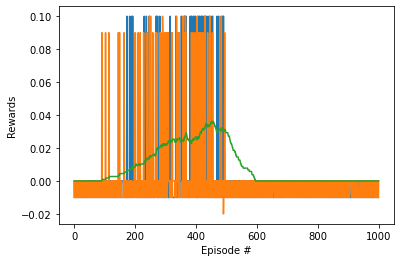

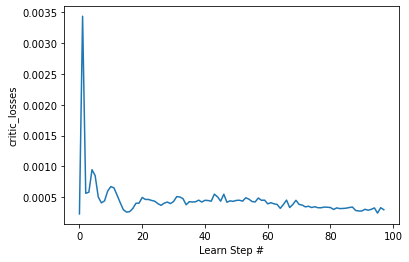

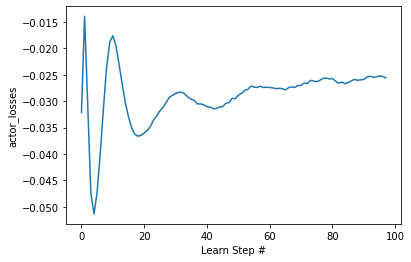

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.4
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
Running on device :  cpu
Episode 0 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.088 seconds, mem : 14


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.959 || 0.315 seconds, mem : 298


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.921 || 0.832 seconds, mem : 582


Episode 60 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.885 || 0.482 seconds, mem : 866


Episode 80 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.850 || 0.521 seconds, mem : 1150


Episode 100 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.817 || 0.661 seconds, mem : 1434


Episode 111 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.001 || Noise  0.799 || 0.189 seconds, mem : 1607
Episode 113 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.002 || Noise  0.796 || 0.161 seconds, mem : 1651


Episode 120 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.785 || 0.537 seconds, mem : 1751
Episode 128 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.003 || Noise  0.772 || 0.152 seconds, mem : 1881


Episode 140 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.003 || Noise  0.754 || 0.506 seconds, mem : 2051
Episode 141 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.004 || Noise  0.753 || 0.167 seconds, mem : 2082
Episode 146 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.005 || Noise  0.745 || 0.129 seconds, mem : 2168


Episode 160 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.005 || Noise  0.724 || 0.582 seconds, mem : 2367


Episode 180 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.005 || Noise  0.696 || 0.515 seconds, mem : 2662
Episode 181 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.006 || Noise  0.695 || 0.148 seconds, mem : 2692
Episode 185 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.007 || Noise  0.689 || 0.152 seconds, mem : 2765
Episode 189 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.008 || Noise  0.684 || 0.142 seconds, mem : 2837


Episode 191 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.681 || 0.158 seconds, mem : 2883
Episode 198 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.671 || 0.137 seconds, mem : 2998
Episode 199 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.011 || Noise  0.670 || 0.145 seconds, mem : 3029


Episode 200 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.011 || Noise  0.669 || 0.517 seconds, mem : 3043
Episode 202 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.666 || 0.160 seconds, mem : 3087


Episode 219 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.011 || Noise  0.644 || 0.158 seconds, mem : 3348


Episode 220 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.011 || Noise  0.642 || 0.513 seconds, mem : 3363
Episode 223 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.639 || 0.144 seconds, mem : 3421


Episode 235 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.623 || 0.147 seconds, mem : 3608
Episode 236 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.622 || 0.146 seconds, mem : 3638


Episode 240 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.013 || Noise  0.617 || 0.485 seconds, mem : 3695
Episode 243 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.614 || 0.168 seconds, mem : 3753


Episode 255 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.599 || 0.151 seconds, mem : 3939


Episode 260 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.013 || Noise  0.593 || 0.496 seconds, mem : 4010
Episode 266 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.586 || 0.136 seconds, mem : 4111


Episode 275 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.575 || 0.147 seconds, mem : 4256
Episode 279 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.016 || Noise  0.571 || 0.180 seconds, mem : 4330


Episode 280 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.016 || Noise  0.570 || 0.597 seconds, mem : 4344


Episode 290 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.558 || 0.594 seconds, mem : 4504
Episode 294 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.554 || 0.159 seconds, mem : 4578
Episode 297 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.551 || 0.151 seconds, mem : 4637
Episode 298 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.550 || 0.152 seconds, mem : 4669


Episode 300 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.014 || Noise  0.547 || 0.531 seconds, mem : 4697


Episode 320 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.526 || 0.537 seconds, mem : 4981
Episode 323 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.523 || 0.168 seconds, mem : 5042


Episode 332 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.513 || 0.138 seconds, mem : 5186
Episode 333 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.512 || 0.160 seconds, mem : 5218


Episode 340 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.505 || 0.490 seconds, mem : 5317
Episode 343 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.502 || 0.154 seconds, mem : 5379


Episode 350 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.495 || 0.565 seconds, mem : 5495


Episode 360 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.485 || 0.513 seconds, mem : 5637
Episode 367 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.479 || 0.162 seconds, mem : 5755


Episode 375 with 33 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.471 || 0.152 seconds, mem : 5887
Episode 377 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.469 || 0.166 seconds, mem : 5934


Episode 380 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.466 || 0.532 seconds, mem : 5976
Episode 382 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.465 || 0.164 seconds, mem : 6023
Episode 387 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.460 || 0.153 seconds, mem : 6113


Episode 396 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.452 || 0.179 seconds, mem : 6264


Episode 400 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.011 || Noise  0.448 || 0.657 seconds, mem : 6320
Episode 407 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.442 || 0.144 seconds, mem : 6438


Episode 411 with 22 steps || Reward : [0.09 0.  ] || avg reward :  0.013 || Noise  0.438 || 0.118 seconds, mem : 6503


Episode 420 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.013 || Noise  0.430 || 0.597 seconds, mem : 6631
Episode 423 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.428 || 0.197 seconds, mem : 6693
Episode 428 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.424 || 0.153 seconds, mem : 6783


Episode 431 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.421 || 0.166 seconds, mem : 6844
Episode 436 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.417 || 0.154 seconds, mem : 6934


Episode 440 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.014 || Noise  0.414 || 0.512 seconds, mem : 6991
Episode 442 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.412 || 0.151 seconds, mem : 7036
Episode 443 with 35 steps || Reward : [0.1  0.09] || avg reward :  0.015 || Noise  0.411 || 0.176 seconds, mem : 7071
Episode 446 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.016 || Noise  0.409 || 0.169 seconds, mem : 7132


Episode 452 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.016 || Noise  0.404 || 0.180 seconds, mem : 7236
Episode 455 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.401 || 0.162 seconds, mem : 7297
Episode 457 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.400 || 0.152 seconds, mem : 7344


Episode 460 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.018 || Noise  0.397 || 0.514 seconds, mem : 7387
Episode 464 with 33 steps || Reward : [0.09 0.  ] || avg reward :  0.019 || Noise  0.394 || 0.162 seconds, mem : 7465
Episode 467 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.392 || 0.166 seconds, mem : 7528


Episode 470 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.389 || 0.571 seconds, mem : 7589
Episode 474 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.386 || 0.171 seconds, mem : 7665
Episode 475 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.386 || 0.151 seconds, mem : 7698
Episode 479 with 28 steps || Reward : [0.19 0.  ] || avg reward :  0.022 || Noise  0.383 || 0.123 seconds, mem : 7768


Episode 480 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.022 || Noise  0.382 || 0.513 seconds, mem : 7782


Episode 498 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.368 || 0.164 seconds, mem : 8056


Episode 500 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.020 || Noise  0.367 || 0.521 seconds, mem : 8084
Episode 503 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.365 || 0.160 seconds, mem : 8146
Episode 509 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.360 || 0.149 seconds, mem : 8249


Episode 518 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.021 || Noise  0.354 || 0.151 seconds, mem : 8397


Episode 520 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.021 || Noise  0.352 || 0.486 seconds, mem : 8426
Episode 521 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.352 || 0.198 seconds, mem : 8458


Episode 540 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.018 || Noise  0.339 || 0.493 seconds, mem : 8728
Episode 543 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.337 || 0.163 seconds, mem : 8789


Episode 560 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.013 || Noise  0.325 || 0.485 seconds, mem : 9031


Episode 576 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.315 || 0.150 seconds, mem : 9277


Episode 580 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.007 || Noise  0.312 || 0.523 seconds, mem : 9333


Episode 600 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.006 || Noise  0.300 || 0.487 seconds, mem : 9617


Episode 620 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.003 || Noise  0.288 || 0.483 seconds, mem : 9901


Episode 640 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.277 || 0.665 seconds, mem : 10185


Episode 660 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.266 || 0.494 seconds, mem : 10469


Episode 680 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.256 || 0.503 seconds, mem : 10753


Episode 700 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.246 || 0.487 seconds, mem : 11038


Episode 712 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.001 || Noise  0.240 || 0.163 seconds, mem : 11234


Episode 720 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.236 || 0.599 seconds, mem : 11352


Episode 740 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.227 || 0.502 seconds, mem : 11636


Episode 760 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.218 || 0.515 seconds, mem : 11920


Episode 780 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.209 || 0.540 seconds, mem : 12204


Episode 800 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.201 || 0.467 seconds, mem : 12488


Episode 820 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.193 || 0.483 seconds, mem : 12772


Episode 840 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.186 || 0.472 seconds, mem : 13056


Episode 860 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.178 || 0.557 seconds, mem : 13340


Episode 880 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.171 || 0.579 seconds, mem : 13624


Episode 900 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.165 || 0.480 seconds, mem : 13910


Episode 920 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.158 || 0.510 seconds, mem : 14194


Episode 940 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.152 || 0.500 seconds, mem : 14478


Episode 960 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.146 || 0.517 seconds, mem : 14762


Episode 980 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.140 || 0.492 seconds, mem : 15046


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.4
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


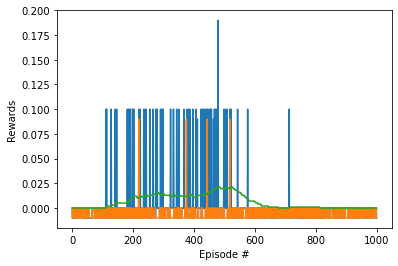

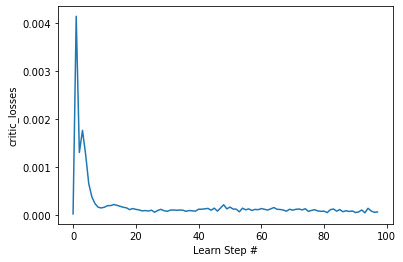

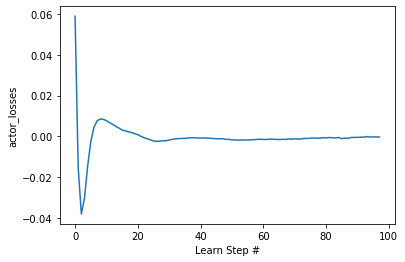

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.4
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001
Running on device :  cpu
Episode 0 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.076 seconds, mem : 14


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.959 || 0.339 seconds, mem : 298


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.921 || 0.970 seconds, mem : 582


Episode 60 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.885 || 0.565 seconds, mem : 866


Episode 80 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.850 || 0.566 seconds, mem : 1150


Episode 100 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.817 || 0.520 seconds, mem : 1434
Episode 109 with 32 steps || Reward : [0.   0.09] || avg reward :  0.001 || Noise  0.802 || 0.171 seconds, mem : 1580


Episode 120 with 29 steps || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.785 || 0.689 seconds, mem : 1751


Episode 140 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.754 || 0.638 seconds, mem : 2035


Episode 152 with 31 steps || Reward : [0.   0.09] || avg reward :  0.003 || Noise  0.736 || 0.151 seconds, mem : 2223


Episode 160 with 30 steps || Reward : [0.   0.09] || avg reward :  0.004 || Noise  0.724 || 0.634 seconds, mem : 2352
Episode 161 with 31 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.723 || 0.151 seconds, mem : 2383
Episode 166 with 30 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.716 || 0.148 seconds, mem : 2470


Episode 170 with 32 steps || Reward : [0.   0.09] || avg reward :  0.006 || Noise  0.710 || 0.623 seconds, mem : 2544
Episode 176 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.007 || Noise  0.702 || 0.120 seconds, mem : 2641


Episode 180 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.007 || Noise  0.696 || 0.516 seconds, mem : 2698
Episode 182 with 30 steps || Reward : [0.   0.09] || avg reward :  0.008 || Noise  0.693 || 0.149 seconds, mem : 2742


Episode 195 with 30 steps || Reward : [0.   0.09] || avg reward :  0.009 || Noise  0.675 || 0.151 seconds, mem : 2943


Episode 200 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.009 || Noise  0.669 || 0.502 seconds, mem : 3014


Episode 220 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.007 || Noise  0.642 || 0.503 seconds, mem : 3298


Episode 236 with 31 steps || Reward : [0.   0.09] || avg reward :  0.008 || Noise  0.622 || 0.141 seconds, mem : 3557


Episode 240 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.008 || Noise  0.617 || 0.505 seconds, mem : 3614
Episode 242 with 44 steps || Reward : [0.1  0.09] || avg reward :  0.009 || Noise  0.615 || 0.209 seconds, mem : 3672
Episode 249 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.010 || Noise  0.606 || 0.181 seconds, mem : 3790


Episode 250 with 30 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.605 || 0.564 seconds, mem : 3820
Episode 253 with 30 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.601 || 0.142 seconds, mem : 3879
Episode 256 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.012 || Noise  0.598 || 0.135 seconds, mem : 3934


Episode 260 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.011 || Noise  0.593 || 0.489 seconds, mem : 3990


Episode 273 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.010 || Noise  0.578 || 0.152 seconds, mem : 4189
Episode 275 with 31 steps || Reward : [0.   0.09] || avg reward :  0.010 || Noise  0.575 || 0.145 seconds, mem : 4234
Episode 279 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.571 || 0.148 seconds, mem : 4307


Episode 280 with 35 steps || Reward : [0.1  0.09] || avg reward :  0.011 || Noise  0.570 || 0.592 seconds, mem : 4342
Episode 281 with 31 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.569 || 0.153 seconds, mem : 4373


Episode 293 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.555 || 0.147 seconds, mem : 4569
Episode 294 with 30 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.554 || 0.145 seconds, mem : 4599
Episode 298 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.550 || 0.149 seconds, mem : 4678
Episode 299 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.548 || 0.136 seconds, mem : 4709


Episode 300 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.014 || Noise  0.547 || 0.511 seconds, mem : 4723
Episode 301 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.015 || Noise  0.546 || 0.182 seconds, mem : 4757
Episode 302 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.545 || 0.152 seconds, mem : 4788
Episode 305 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.542 || 0.137 seconds, mem : 4847


Episode 311 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.535 || 0.178 seconds, mem : 4951
Episode 312 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.534 || 0.135 seconds, mem : 4978
Episode 313 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.533 || 0.152 seconds, mem : 5009
Episode 316 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.530 || 0.157 seconds, mem : 5069


Episode 320 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.526 || 0.562 seconds, mem : 5143
Episode 323 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.523 || 0.154 seconds, mem : 5202
Episode 324 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.522 || 0.142 seconds, mem : 5233
Episode 326 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.520 || 0.141 seconds, mem : 5277
Episode 327 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.519 || 0.137 seconds, mem : 5308


Episode 328 with 32 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.518 || 0.147 seconds, mem : 5340
Episode 332 with 31 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.513 || 0.138 seconds, mem : 5413
Episode 333 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.512 || 0.140 seconds, mem : 5445


Episode 335 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.030 || Noise  0.510 || 0.145 seconds, mem : 5508
Episode 336 with 36 steps || Reward : [0.   0.09] || avg reward :  0.030 || Noise  0.509 || 0.169 seconds, mem : 5544
Episode 338 with 32 steps || Reward : [0.   0.09] || avg reward :  0.031 || Noise  0.507 || 0.139 seconds, mem : 5590


Episode 340 with 32 steps || Reward : [0.   0.09] || avg reward :  0.032 || Noise  0.505 || 0.569 seconds, mem : 5636
Episode 343 with 32 steps || Reward : [0.   0.09] || avg reward :  0.031 || Noise  0.502 || 0.151 seconds, mem : 5696
Episode 345 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.500 || 0.122 seconds, mem : 5738
Episode 347 with 31 steps || Reward : [0.   0.09] || avg reward :  0.033 || Noise  0.498 || 0.133 seconds, mem : 5783
Episode 348 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.034 || Noise  0.497 || 0.148 seconds, mem : 5816
Episode 349 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.034 || Noise  0.496 || 0.145 seconds, mem : 5843


Episode 351 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.494 || 0.137 seconds, mem : 5887
Episode 352 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.035 || Noise  0.493 || 0.128 seconds, mem : 5916
Episode 354 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.036 || Noise  0.491 || 0.162 seconds, mem : 5961
Episode 355 with 32 steps || Reward : [0.   0.09] || avg reward :  0.036 || Noise  0.490 || 0.155 seconds, mem : 5993
Episode 356 with 30 steps || Reward : [0.   0.09] || avg reward :  0.036 || Noise  0.489 || 0.164 seconds, mem : 6023


Episode 358 with 32 steps || Reward : [0.   0.09] || avg reward :  0.037 || Noise  0.487 || 0.177 seconds, mem : 6069
Episode 359 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.038 || Noise  0.486 || 0.167 seconds, mem : 6099
Episode 360 with 16 steps || Reward : [ 0.   -0.01] || avg reward :  0.038 || Noise  0.485 || 0.598 seconds, mem : 6115
Episode 361 with 31 steps || Reward : [0.   0.09] || avg reward :  0.039 || Noise  0.484 || 0.165 seconds, mem : 6146


Episode 362 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.040 || Noise  0.483 || 0.169 seconds, mem : 6176
Episode 363 with 33 steps || Reward : [0.   0.09] || avg reward :  0.041 || Noise  0.483 || 0.180 seconds, mem : 6209


Episode 374 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.041 || Noise  0.472 || 0.133 seconds, mem : 6395
Episode 375 with 31 steps || Reward : [0.   0.09] || avg reward :  0.041 || Noise  0.471 || 0.139 seconds, mem : 6426
Episode 377 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.042 || Noise  0.469 || 0.122 seconds, mem : 6466
Episode 378 with 30 steps || Reward : [0.   0.09] || avg reward :  0.043 || Noise  0.468 || 0.131 seconds, mem : 6496


Episode 380 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.042 || Noise  0.466 || 0.567 seconds, mem : 6541
Episode 383 with 44 steps || Reward : [0.09 0.  ] || avg reward :  0.042 || Noise  0.464 || 0.202 seconds, mem : 6613
Episode 384 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.043 || Noise  0.463 || 0.142 seconds, mem : 6644
Episode 386 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.044 || Noise  0.461 || 0.154 seconds, mem : 6685
Episode 387 with 31 steps || Reward : [0.   0.09] || avg reward :  0.045 || Noise  0.460 || 0.130 seconds, mem : 6716


Episode 389 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.046 || Noise  0.458 || 0.147 seconds, mem : 6762
Episode 390 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.047 || Noise  0.457 || 0.566 seconds, mem : 6794


Episode 394 with 31 steps || Reward : [0.   0.09] || avg reward :  0.046 || Noise  0.453 || 0.150 seconds, mem : 6867
Episode 395 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.047 || Noise  0.453 || 0.130 seconds, mem : 6896
Episode 397 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.048 || Noise  0.451 || 0.162 seconds, mem : 6944
Episode 400 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.046 || Noise  0.448 || 0.497 seconds, mem : 6987


Episode 401 with 45 steps || Reward : [0.1  0.09] || avg reward :  0.046 || Noise  0.447 || 0.200 seconds, mem : 7032
Episode 402 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.046 || Noise  0.446 || 0.170 seconds, mem : 7063
Episode 407 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.046 || Noise  0.442 || 0.160 seconds, mem : 7150


Episode 412 with 31 steps || Reward : [0.   0.09] || avg reward :  0.045 || Noise  0.437 || 0.133 seconds, mem : 7238
Episode 413 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.045 || Noise  0.437 || 0.182 seconds, mem : 7272
Episode 417 with 33 steps || Reward : [0.   0.09] || avg reward :  0.045 || Noise  0.433 || 0.152 seconds, mem : 7349
Episode 418 with 30 steps || Reward : [0.   0.09] || avg reward :  0.046 || Noise  0.432 || 0.139 seconds, mem : 7379


Episode 419 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.047 || Noise  0.431 || 0.138 seconds, mem : 7406
Episode 420 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.046 || Noise  0.430 || 0.509 seconds, mem : 7420
Episode 421 with 31 steps || Reward : [0.   0.09] || avg reward :  0.047 || Noise  0.430 || 0.143 seconds, mem : 7451


Episode 423 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.047 || Noise  0.428 || 0.150 seconds, mem : 7497
Episode 424 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.047 || Noise  0.427 || 0.158 seconds, mem : 7529
Episode 425 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.048 || Noise  0.426 || 0.156 seconds, mem : 7560


Episode 431 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.046 || Noise  0.421 || 0.145 seconds, mem : 7662
Episode 433 with 32 steps || Reward : [0.   0.09] || avg reward :  0.045 || Noise  0.419 || 0.180 seconds, mem : 7708
Episode 438 with 31 steps || Reward : [0.   0.09] || avg reward :  0.043 || Noise  0.415 || 0.146 seconds, mem : 7795


Episode 440 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.042 || Noise  0.414 || 0.518 seconds, mem : 7824
Episode 447 with 33 steps || Reward : [0.   0.09] || avg reward :  0.040 || Noise  0.408 || 0.163 seconds, mem : 7945


Episode 451 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.038 || Noise  0.405 || 0.137 seconds, mem : 8018
Episode 459 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.398 || 0.149 seconds, mem : 8146


Episode 460 with 18 steps || Reward : [-0.01  0.  ] || avg reward :  0.034 || Noise  0.397 || 0.507 seconds, mem : 8164


Episode 480 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.026 || Noise  0.382 || 0.495 seconds, mem : 8447
Episode 481 with 19 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.381 || 0.106 seconds, mem : 8466
Episode 484 with 23 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.379 || 0.102 seconds, mem : 8518
Episode 486 with 45 steps || Reward : [0.09 0.1 ] || avg reward :  0.026 || Noise  0.377 || 0.243 seconds, mem : 8577
Episode 487 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.376 || 0.142 seconds, mem : 8606


Episode 500 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.021 || Noise  0.367 || 0.508 seconds, mem : 8797


Episode 511 with 23 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.359 || 0.114 seconds, mem : 8961
Episode 512 with 46 steps || Reward : [0.1  0.09] || avg reward :  0.019 || Noise  0.358 || 0.221 seconds, mem : 9007
Episode 519 with 24 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.353 || 0.107 seconds, mem : 9116


Episode 520 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.352 || 0.539 seconds, mem : 9130


Episode 531 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.345 || 0.135 seconds, mem : 9299


Episode 540 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.011 || Noise  0.339 || 0.498 seconds, mem : 9432


Episode 560 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.008 || Noise  0.325 || 0.514 seconds, mem : 9716


Episode 580 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.008 || Noise  0.312 || 0.593 seconds, mem : 10000


Episode 600 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.004 || Noise  0.300 || 0.500 seconds, mem : 10284


Episode 620 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.288 || 0.502 seconds, mem : 10568


Episode 640 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.277 || 0.482 seconds, mem : 10852


Episode 660 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.266 || 0.471 seconds, mem : 11136


Episode 680 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.256 || 0.480 seconds, mem : 11420


Episode 700 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.246 || 0.478 seconds, mem : 11704


Episode 720 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.236 || 0.487 seconds, mem : 11988


Episode 740 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.227 || 0.661 seconds, mem : 12272


Episode 760 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.218 || 0.480 seconds, mem : 12556


Episode 780 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.209 || 0.459 seconds, mem : 12840


Episode 800 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.201 || 0.427 seconds, mem : 13124


Episode 820 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.193 || 0.422 seconds, mem : 13408


Episode 840 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.186 || 0.431 seconds, mem : 13692


Episode 860 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.178 || 0.554 seconds, mem : 13976


Episode 880 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.171 || 0.453 seconds, mem : 14260


Episode 900 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.165 || 0.449 seconds, mem : 14544


Episode 920 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.158 || 0.447 seconds, mem : 14828


Episode 940 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.152 || 0.451 seconds, mem : 15112


Episode 960 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.146 || 0.419 seconds, mem : 15396


Episode 980 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.140 || 0.418 seconds, mem : 15680


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.4
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


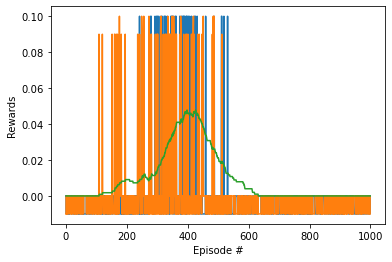

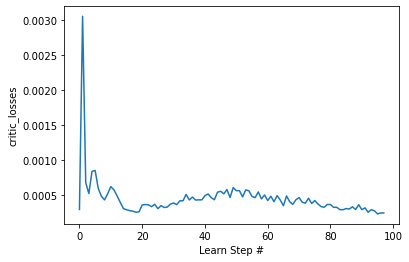

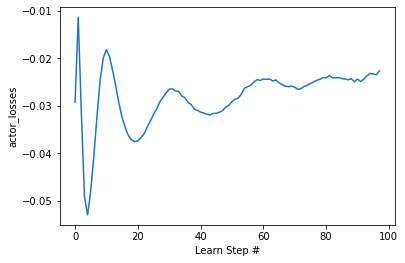

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.6
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
Running on device :  cpu
Episode 0 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.998 || 0.065 seconds, mem : 14


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.959 || 0.292 seconds, mem : 298


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.921 || 0.673 seconds, mem : 582


Episode 60 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.885 || 0.457 seconds, mem : 866


Episode 80 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.850 || 0.432 seconds, mem : 1150


Episode 100 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.817 || 0.433 seconds, mem : 1434


Episode 111 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.001 || Noise  0.799 || 0.117 seconds, mem : 1605


Episode 117 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.002 || Noise  0.790 || 0.132 seconds, mem : 1722
Episode 120 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.785 || 0.435 seconds, mem : 1765


Episode 127 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.003 || Noise  0.774 || 0.129 seconds, mem : 1881


Episode 140 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.754 || 0.411 seconds, mem : 2065


Episode 143 with 32 steps || Reward : [0.1  0.09] || avg reward :  0.004 || Noise  0.750 || 0.138 seconds, mem : 2126


Episode 157 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.005 || Noise  0.729 || 0.161 seconds, mem : 2343
Episode 158 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.006 || Noise  0.727 || 0.148 seconds, mem : 2374


Episode 160 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.006 || Noise  0.724 || 0.517 seconds, mem : 2402
Episode 162 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.007 || Noise  0.722 || 0.131 seconds, mem : 2448
Episode 165 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.008 || Noise  0.717 || 0.131 seconds, mem : 2508
Episode 168 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.713 || 0.124 seconds, mem : 2565


Episode 175 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.703 || 0.121 seconds, mem : 2680


Episode 180 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.011 || Noise  0.696 || 0.491 seconds, mem : 2768
Episode 187 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.686 || 0.131 seconds, mem : 2884


Episode 192 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.680 || 0.114 seconds, mem : 2970
Episode 195 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.675 || 0.132 seconds, mem : 3029
Episode 198 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.671 || 0.132 seconds, mem : 3087


Episode 200 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.015 || Noise  0.669 || 0.464 seconds, mem : 3116
Episode 201 with 44 steps || Reward : [0.1  0.09] || avg reward :  0.016 || Noise  0.667 || 0.186 seconds, mem : 3160


Episode 213 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.016 || Noise  0.652 || 0.135 seconds, mem : 3347


Episode 220 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.015 || Noise  0.642 || 0.413 seconds, mem : 3447
Episode 222 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.016 || Noise  0.640 || 0.153 seconds, mem : 3493


Episode 231 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.016 || Noise  0.628 || 0.148 seconds, mem : 3638
Episode 235 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.623 || 0.138 seconds, mem : 3713
Episode 239 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.618 || 0.127 seconds, mem : 3785


Episode 240 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.018 || Noise  0.617 || 0.443 seconds, mem : 3800


Episode 260 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.015 || Noise  0.593 || 0.433 seconds, mem : 4084


Episode 270 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.581 || 0.522 seconds, mem : 4243
Episode 271 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.580 || 0.156 seconds, mem : 4273
Episode 275 with 44 steps || Reward : [0.1  0.09] || avg reward :  0.014 || Noise  0.575 || 0.214 seconds, mem : 4360


Episode 280 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.570 || 0.578 seconds, mem : 4446


Episode 300 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.010 || Noise  0.547 || 0.410 seconds, mem : 4730
Episode 308 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.539 || 0.135 seconds, mem : 4863


Episode 316 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.530 || 0.127 seconds, mem : 4993


Episode 320 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.010 || Noise  0.526 || 0.423 seconds, mem : 5050
Episode 321 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.011 || Noise  0.525 || 0.146 seconds, mem : 5083
Episode 324 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.011 || Noise  0.522 || 0.124 seconds, mem : 5142


Episode 335 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.510 || 0.137 seconds, mem : 5320


Episode 340 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.009 || Noise  0.505 || 0.416 seconds, mem : 5391
Episode 343 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.502 || 0.147 seconds, mem : 5452
Episode 344 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.011 || Noise  0.501 || 0.143 seconds, mem : 5485
Episode 345 with 29 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.500 || 0.123 seconds, mem : 5514
Episode 349 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.496 || 0.143 seconds, mem : 5590


Episode 357 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.488 || 0.126 seconds, mem : 5722
Episode 358 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.487 || 0.129 seconds, mem : 5755
Episode 359 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.486 || 0.132 seconds, mem : 5786


Episode 360 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.016 || Noise  0.485 || 0.455 seconds, mem : 5801
Episode 361 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.484 || 0.135 seconds, mem : 5832
Episode 368 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.478 || 0.131 seconds, mem : 5950
Episode 369 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.477 || 0.121 seconds, mem : 5980


Episode 371 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.475 || 0.138 seconds, mem : 6026
Episode 374 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.472 || 0.137 seconds, mem : 6087
Episode 375 with 33 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.471 || 0.133 seconds, mem : 6120
Episode 376 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.470 || 0.147 seconds, mem : 6153
Episode 378 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.468 || 0.139 seconds, mem : 6200


Episode 380 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.466 || 0.549 seconds, mem : 6247
Episode 381 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.465 || 0.167 seconds, mem : 6280
Episode 382 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.465 || 0.155 seconds, mem : 6313
Episode 386 with 35 steps || Reward : [-0.01  0.1 ] || avg reward :  0.024 || Noise  0.461 || 0.155 seconds, mem : 6390


Episode 392 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.455 || 0.158 seconds, mem : 6493
Episode 399 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.449 || 0.128 seconds, mem : 6613


Episode 400 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.448 || 0.498 seconds, mem : 6646
Episode 402 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.028 || Noise  0.446 || 0.115 seconds, mem : 6689
Episode 404 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.444 || 0.133 seconds, mem : 6736
Episode 405 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.444 || 0.129 seconds, mem : 6768
Episode 407 with 43 steps || Reward : [0.1  0.09] || avg reward :  0.031 || Noise  0.442 || 0.218 seconds, mem : 6825


Episode 412 with 34 steps || Reward : [0.   0.09] || avg reward :  0.030 || Noise  0.437 || 0.214 seconds, mem : 6915
Episode 414 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.031 || Noise  0.436 || 0.163 seconds, mem : 6974
Episode 416 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.434 || 0.176 seconds, mem : 7022
Episode 418 with 24 steps || Reward : [-0.01  0.1 ] || avg reward :  0.032 || Noise  0.432 || 0.114 seconds, mem : 7060


Episode 420 with 19 steps || Reward : [ 0.   -0.01] || avg reward :  0.032 || Noise  0.430 || 0.449 seconds, mem : 7093
Episode 421 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.430 || 0.130 seconds, mem : 7126
Episode 422 with 30 steps || Reward : [0.   0.09] || avg reward :  0.033 || Noise  0.429 || 0.129 seconds, mem : 7156


Episode 432 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.033 || Noise  0.420 || 0.141 seconds, mem : 7317
Episode 433 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.419 || 0.132 seconds, mem : 7350


Episode 439 with 56 steps || Reward : [0.1  0.19] || avg reward :  0.035 || Noise  0.414 || 0.221 seconds, mem : 7480


Episode 440 with 25 steps || Reward : [-0.01  0.1 ] || avg reward :  0.036 || Noise  0.414 || 0.469 seconds, mem : 7505
Episode 444 with 32 steps || Reward : [0.   0.09] || avg reward :  0.035 || Noise  0.410 || 0.131 seconds, mem : 7587
Episode 446 with 31 steps || Reward : [0.   0.09] || avg reward :  0.035 || Noise  0.409 || 0.125 seconds, mem : 7632
Episode 447 with 31 steps || Reward : [0.   0.09] || avg reward :  0.036 || Noise  0.408 || 0.135 seconds, mem : 7663
Episode 448 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.037 || Noise  0.407 || 0.150 seconds, mem : 7696


Episode 453 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.037 || Noise  0.403 || 0.130 seconds, mem : 7786
Episode 458 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.399 || 0.135 seconds, mem : 7875


Episode 460 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.035 || Noise  0.397 || 0.428 seconds, mem : 7904
Episode 461 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.035 || Noise  0.397 || 0.141 seconds, mem : 7936
Episode 467 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.392 || 0.135 seconds, mem : 8059


Episode 472 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.388 || 0.146 seconds, mem : 8155
Episode 479 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.383 || 0.130 seconds, mem : 8273


Episode 480 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.382 || 0.588 seconds, mem : 8306


Episode 500 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.025 || Noise  0.367 || 0.432 seconds, mem : 8590


Episode 520 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.018 || Noise  0.352 || 0.442 seconds, mem : 8876


Episode 538 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.340 || 0.132 seconds, mem : 9150


Episode 540 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.339 || 0.432 seconds, mem : 9178


Episode 560 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.006 || Noise  0.325 || 0.430 seconds, mem : 9464


Episode 572 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.004 || Noise  0.318 || 0.111 seconds, mem : 9648


Episode 580 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.312 || 0.416 seconds, mem : 9761


Episode 600 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.300 || 0.460 seconds, mem : 10045
Episode 605 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.003 || Noise  0.297 || 0.150 seconds, mem : 10131


Episode 620 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.288 || 0.429 seconds, mem : 10344


Episode 640 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.277 || 0.430 seconds, mem : 10628


Episode 660 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.266 || 0.431 seconds, mem : 10912


Episode 680 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.256 || 0.480 seconds, mem : 11196


Episode 700 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.246 || 0.421 seconds, mem : 11480


Episode 720 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.236 || 0.432 seconds, mem : 11764


Episode 740 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.227 || 0.425 seconds, mem : 12048


Episode 760 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.218 || 0.413 seconds, mem : 12332


Episode 780 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.209 || 0.428 seconds, mem : 12616


Episode 800 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.201 || 0.432 seconds, mem : 12900


Episode 820 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.193 || 0.437 seconds, mem : 13184


Episode 840 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.186 || 0.430 seconds, mem : 13468


Episode 860 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.178 || 0.429 seconds, mem : 13752


Episode 880 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.171 || 0.503 seconds, mem : 14036


Episode 900 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.165 || 0.557 seconds, mem : 14320


Episode 920 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.158 || 0.448 seconds, mem : 14604


Episode 940 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.152 || 0.446 seconds, mem : 14888


Episode 960 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.146 || 0.423 seconds, mem : 15172


Episode 980 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.140 || 0.580 seconds, mem : 15456


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.6
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


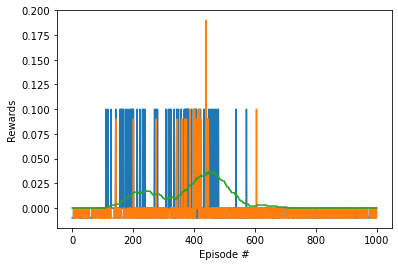

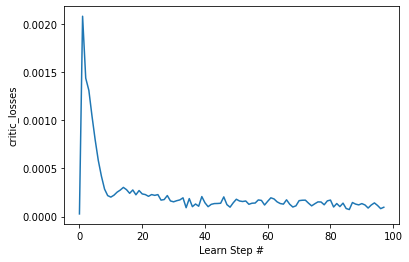

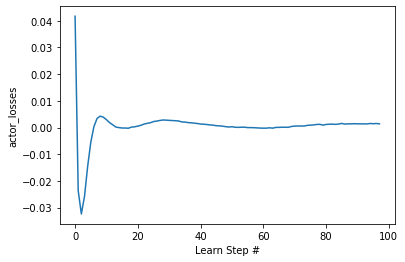

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.6
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001
Running on device :  cpu
Episode 0 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.067 seconds, mem : 14


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.959 || 0.303 seconds, mem : 298


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.921 || 0.652 seconds, mem : 582


Episode 60 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.885 || 0.477 seconds, mem : 866


Episode 80 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.850 || 0.431 seconds, mem : 1150


Episode 100 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.817 || 0.518 seconds, mem : 1434
Episode 109 with 30 steps || Reward : [0.   0.09] || avg reward :  0.001 || Noise  0.802 || 0.142 seconds, mem : 1578


Episode 120 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.785 || 0.496 seconds, mem : 1735
Episode 123 with 29 steps || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.780 || 0.141 seconds, mem : 1792


Episode 140 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.754 || 0.520 seconds, mem : 2034
Episode 142 with 32 steps || Reward : [0.   0.09] || avg reward :  0.003 || Noise  0.751 || 0.149 seconds, mem : 2080


Episode 160 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.724 || 0.466 seconds, mem : 2335


Episode 180 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.696 || 0.466 seconds, mem : 2619
Episode 187 with 30 steps || Reward : [0.   0.09] || avg reward :  0.004 || Noise  0.686 || 0.136 seconds, mem : 2740


Episode 200 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.004 || Noise  0.669 || 0.487 seconds, mem : 2925
Episode 208 with 30 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.658 || 0.140 seconds, mem : 3054


Episode 214 with 31 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.650 || 0.146 seconds, mem : 3156


Episode 220 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.005 || Noise  0.642 || 0.467 seconds, mem : 3241
Episode 225 with 31 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.636 || 0.146 seconds, mem : 3329


Episode 233 with 31 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.626 || 0.173 seconds, mem : 3459


Episode 240 with 30 steps || Reward : [0.   0.09] || avg reward :  0.006 || Noise  0.617 || 0.631 seconds, mem : 3575
Episode 244 with 30 steps || Reward : [0.   0.09] || avg reward :  0.006 || Noise  0.612 || 0.167 seconds, mem : 3647


Episode 259 with 30 steps || Reward : [0.   0.09] || avg reward :  0.007 || Noise  0.594 || 0.164 seconds, mem : 3889
Episode 260 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.007 || Noise  0.593 || 0.516 seconds, mem : 3903
Episode 262 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.008 || Noise  0.591 || 0.118 seconds, mem : 3944
Episode 263 with 29 steps || Reward : [0.   0.09] || avg reward :  0.009 || Noise  0.589 || 0.144 seconds, mem : 3973


Episode 266 with 31 steps || Reward : [0.   0.09] || avg reward :  0.010 || Noise  0.586 || 0.179 seconds, mem : 4033


Episode 273 with 32 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.578 || 0.153 seconds, mem : 4150
Episode 276 with 30 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.574 || 0.143 seconds, mem : 4208


Episode 280 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.570 || 0.523 seconds, mem : 4265
Episode 286 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.013 || Noise  0.563 || 0.114 seconds, mem : 4362


Episode 298 with 31 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.550 || 0.146 seconds, mem : 4548


Episode 300 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.013 || Noise  0.547 || 0.515 seconds, mem : 4576
Episode 307 with 32 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.540 || 0.150 seconds, mem : 4693


Episode 315 with 29 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.531 || 0.139 seconds, mem : 4821


Episode 320 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.013 || Noise  0.526 || 0.470 seconds, mem : 4894
Episode 322 with 30 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.524 || 0.140 seconds, mem : 4938
Episode 326 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.520 || 0.154 seconds, mem : 5012
Episode 327 with 32 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.519 || 0.144 seconds, mem : 5044


Episode 330 with 32 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.515 || 0.587 seconds, mem : 5104
Episode 331 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.514 || 0.147 seconds, mem : 5132
Episode 333 with 29 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.512 || 0.135 seconds, mem : 5176
Episode 339 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.506 || 0.153 seconds, mem : 5278


Episode 340 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.017 || Noise  0.505 || 0.478 seconds, mem : 5293
Episode 342 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.503 || 0.154 seconds, mem : 5340
Episode 345 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.500 || 0.149 seconds, mem : 5398
Episode 349 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.496 || 0.168 seconds, mem : 5472


Episode 360 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.018 || Noise  0.485 || 0.533 seconds, mem : 5628


Episode 380 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.466 || 0.618 seconds, mem : 5929
Episode 387 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.014 || Noise  0.460 || 0.155 seconds, mem : 6046


Episode 390 with 32 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.457 || 0.610 seconds, mem : 6106
Episode 391 with 33 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.456 || 0.169 seconds, mem : 6139
Episode 394 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.017 || Noise  0.453 || 0.167 seconds, mem : 6202
Episode 396 with 33 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.452 || 0.167 seconds, mem : 6249


Episode 400 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.448 || 0.524 seconds, mem : 6306
Episode 404 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.444 || 0.152 seconds, mem : 6380
Episode 406 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.443 || 0.132 seconds, mem : 6420
Episode 409 with 36 steps || Reward : [0.2  0.09] || avg reward :  0.020 || Noise  0.440 || 0.194 seconds, mem : 6484


Episode 411 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.438 || 0.165 seconds, mem : 6529
Episode 412 with 32 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.437 || 0.165 seconds, mem : 6561
Episode 415 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.435 || 0.152 seconds, mem : 6621
Episode 417 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.433 || 0.160 seconds, mem : 6667


Episode 419 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.024 || Noise  0.431 || 0.142 seconds, mem : 6707
Episode 420 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.024 || Noise  0.430 || 0.546 seconds, mem : 6721
Episode 421 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.430 || 0.154 seconds, mem : 6754


Episode 429 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.023 || Noise  0.423 || 0.165 seconds, mem : 6889


Episode 434 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.419 || 0.154 seconds, mem : 6977
Episode 436 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.417 || 0.160 seconds, mem : 7022
Episode 438 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.415 || 0.152 seconds, mem : 7068


Episode 440 with 33 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.414 || 0.605 seconds, mem : 7115
Episode 443 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.411 || 0.152 seconds, mem : 7174
Episode 446 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.409 || 0.178 seconds, mem : 7233
Episode 449 with 32 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.406 || 0.158 seconds, mem : 7294


Episode 454 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.024 || Noise  0.402 || 0.146 seconds, mem : 7377


Episode 460 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.024 || Noise  0.397 || 0.551 seconds, mem : 7462
Episode 465 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.393 || 0.175 seconds, mem : 7551


Episode 470 with 31 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.389 || 1.031 seconds, mem : 7639


Episode 480 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.025 || Noise  0.382 || 0.484 seconds, mem : 7799
Episode 481 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.381 || 0.136 seconds, mem : 7830


Episode 500 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.022 || Noise  0.367 || 0.436 seconds, mem : 8099


Episode 520 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.013 || Noise  0.352 || 0.428 seconds, mem : 8383


Episode 540 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.007 || Noise  0.339 || 0.421 seconds, mem : 8667


Episode 560 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.325 || 0.432 seconds, mem : 8951


Episode 580 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.312 || 0.429 seconds, mem : 9235


Episode 600 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.300 || 0.424 seconds, mem : 9519


Episode 620 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.288 || 0.420 seconds, mem : 9803


Episode 640 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.277 || 0.433 seconds, mem : 10087


Episode 660 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.266 || 0.420 seconds, mem : 10371


Episode 680 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.256 || 0.422 seconds, mem : 10655


Episode 700 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.246 || 0.477 seconds, mem : 10939


Episode 720 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.236 || 0.453 seconds, mem : 11223


Episode 740 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.227 || 0.413 seconds, mem : 11507


Episode 760 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.218 || 0.531 seconds, mem : 11791


Episode 780 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.209 || 0.415 seconds, mem : 12075


Episode 800 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.201 || 0.422 seconds, mem : 12359


Episode 820 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.193 || 0.429 seconds, mem : 12643


Episode 840 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.186 || 0.433 seconds, mem : 12927


Episode 860 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.178 || 0.410 seconds, mem : 13211


Episode 880 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.171 || 0.419 seconds, mem : 13495


Episode 900 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.165 || 0.429 seconds, mem : 13779


Episode 920 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.158 || 0.431 seconds, mem : 14063


Episode 940 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.152 || 0.419 seconds, mem : 14347


Episode 960 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.146 || 0.422 seconds, mem : 14631


Episode 980 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.140 || 0.418 seconds, mem : 14915


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.6
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


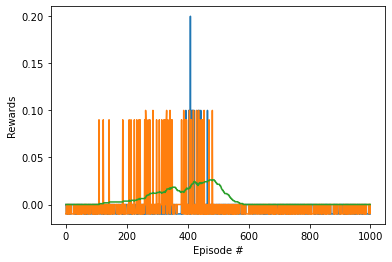

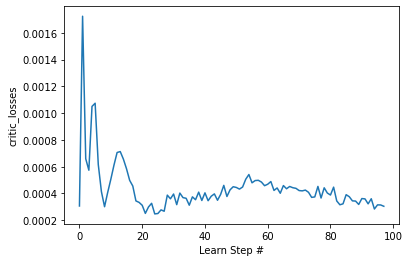

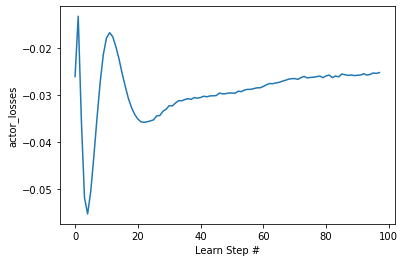

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.5
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
Running on device :  cpu
Episode 0 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.065 seconds, mem : 14


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.959 || 0.306 seconds, mem : 298


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.921 || 1.773 seconds, mem : 582


Episode 60 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.885 || 0.526 seconds, mem : 866


Episode 80 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.850 || 0.473 seconds, mem : 1150


Episode 100 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.817 || 0.452 seconds, mem : 1439


Episode 120 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.785 || 0.442 seconds, mem : 1723
Episode 129 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.001 || Noise  0.771 || 0.127 seconds, mem : 1880


Episode 140 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.754 || 0.434 seconds, mem : 2036


Episode 160 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.724 || 0.437 seconds, mem : 2320
Episode 164 with 32 steps || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.719 || 0.137 seconds, mem : 2394
Episode 168 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.003 || Noise  0.713 || 0.128 seconds, mem : 2463


Episode 174 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.004 || Noise  0.704 || 0.124 seconds, mem : 2565


Episode 180 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.004 || Noise  0.696 || 0.419 seconds, mem : 2650


Episode 200 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.004 || Noise  0.669 || 0.432 seconds, mem : 2934


Episode 210 with 29 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.655 || 0.471 seconds, mem : 3091
Episode 211 with 31 steps || Reward : [0.   0.09] || avg reward :  0.006 || Noise  0.654 || 0.162 seconds, mem : 3122
Episode 212 with 31 steps || Reward : [0.   0.09] || avg reward :  0.007 || Noise  0.653 || 0.141 seconds, mem : 3153
Episode 215 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.008 || Noise  0.649 || 0.128 seconds, mem : 3209


Episode 220 with 29 steps || Reward : [0.   0.09] || avg reward :  0.009 || Noise  0.642 || 0.512 seconds, mem : 3295
Episode 225 with 30 steps || Reward : [0.   0.09] || avg reward :  0.009 || Noise  0.636 || 0.127 seconds, mem : 3382


Episode 240 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.008 || Noise  0.617 || 0.405 seconds, mem : 3595


Episode 256 with 42 steps || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.598 || 0.160 seconds, mem : 3850
Episode 259 with 30 steps || Reward : [0.   0.09] || avg reward :  0.010 || Noise  0.594 || 0.134 seconds, mem : 3916


Episode 260 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.010 || Noise  0.593 || 0.446 seconds, mem : 3931
Episode 269 with 37 steps || Reward : [0.1  0.09] || avg reward :  0.009 || Noise  0.582 || 0.148 seconds, mem : 4081


Episode 274 with 30 steps || Reward : [0.   0.09] || avg reward :  0.009 || Noise  0.577 || 0.132 seconds, mem : 4167


Episode 280 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.009 || Noise  0.570 || 0.432 seconds, mem : 4253
Episode 288 with 31 steps || Reward : [0.   0.09] || avg reward :  0.010 || Noise  0.561 || 0.127 seconds, mem : 4383


Episode 290 with 30 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.558 || 0.497 seconds, mem : 4428
Episode 292 with 42 steps || Reward : [0.1  0.09] || avg reward :  0.012 || Noise  0.556 || 0.174 seconds, mem : 4484


Episode 300 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.547 || 0.434 seconds, mem : 4597
Episode 304 with 42 steps || Reward : [0.1  0.09] || avg reward :  0.013 || Noise  0.543 || 0.181 seconds, mem : 4682
Episode 305 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.542 || 0.127 seconds, mem : 4713
Episode 306 with 32 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.541 || 0.145 seconds, mem : 4745


Episode 316 with 30 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.530 || 0.183 seconds, mem : 4903
Episode 319 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.013 || Noise  0.527 || 0.228 seconds, mem : 4965


Episode 320 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.526 || 0.705 seconds, mem : 4979
Episode 323 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.523 || 0.210 seconds, mem : 5038
Episode 327 with 30 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.519 || 0.185 seconds, mem : 5111


Episode 335 with 32 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.510 || 0.160 seconds, mem : 5242
Episode 337 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.508 || 0.257 seconds, mem : 5290


Episode 340 with 18 steps || Reward : [ 0.   -0.01] || avg reward :  0.015 || Noise  0.505 || 0.454 seconds, mem : 5336
Episode 346 with 30 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.499 || 0.119 seconds, mem : 5437


Episode 352 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.493 || 0.151 seconds, mem : 5546
Episode 354 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.491 || 0.133 seconds, mem : 5593
Episode 356 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.489 || 0.194 seconds, mem : 5638


Episode 360 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.485 || 1.182 seconds, mem : 5709


Episode 370 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.476 || 1.162 seconds, mem : 5868
Episode 371 with 31 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.475 || 0.278 seconds, mem : 5899
Episode 374 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.472 || 0.172 seconds, mem : 5960
Episode 375 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.471 || 0.164 seconds, mem : 5991


Episode 376 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.470 || 0.188 seconds, mem : 6024
Episode 380 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.021 || Noise  0.466 || 0.551 seconds, mem : 6081
Episode 382 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.022 || Noise  0.465 || 0.166 seconds, mem : 6125
Episode 383 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.464 || 0.185 seconds, mem : 6157


Episode 386 with 24 steps || Reward : [-0.01  0.1 ] || avg reward :  0.024 || Noise  0.461 || 0.136 seconds, mem : 6209
Episode 387 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.460 || 0.327 seconds, mem : 6242


Episode 389 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.458 || 0.286 seconds, mem : 6287


Episode 392 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.455 || 0.163 seconds, mem : 6348
Episode 398 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.450 || 0.115 seconds, mem : 6465
Episode 399 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.449 || 0.136 seconds, mem : 6498


Episode 400 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.027 || Noise  0.448 || 0.519 seconds, mem : 6525
Episode 401 with 36 steps || Reward : [0.1  0.09] || avg reward :  0.028 || Noise  0.447 || 0.208 seconds, mem : 6561
Episode 403 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.445 || 0.195 seconds, mem : 6608
Episode 405 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.444 || 0.172 seconds, mem : 6666
Episode 406 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.443 || 0.143 seconds, mem : 6699


Episode 408 with 32 steps || Reward : [0.   0.09] || avg reward :  0.029 || Noise  0.441 || 0.181 seconds, mem : 6745


Episode 415 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.435 || 0.162 seconds, mem : 6862
Episode 419 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.431 || 0.156 seconds, mem : 6937


Episode 420 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.029 || Noise  0.430 || 0.548 seconds, mem : 6951
Episode 427 with 24 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.424 || 0.100 seconds, mem : 7061


Episode 440 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.026 || Noise  0.414 || 0.502 seconds, mem : 7245


Episode 454 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.402 || 0.153 seconds, mem : 7466
Episode 457 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.025 || Noise  0.400 || 0.182 seconds, mem : 7528


Episode 460 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.024 || Noise  0.397 || 0.514 seconds, mem : 7570
Episode 463 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.395 || 0.150 seconds, mem : 7628
Episode 466 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.393 || 0.136 seconds, mem : 7683


Episode 471 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.389 || 0.216 seconds, mem : 7771
Episode 472 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.388 || 0.201 seconds, mem : 7804
Episode 475 with 37 steps || Reward : [0.1  0.09] || avg reward :  0.025 || Noise  0.386 || 0.222 seconds, mem : 7872


Episode 480 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.382 || 0.662 seconds, mem : 7965


Episode 484 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.379 || 0.164 seconds, mem : 8038


Episode 499 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.368 || 0.294 seconds, mem : 8274
Episode 500 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.018 || Noise  0.367 || 0.872 seconds, mem : 8288


Episode 506 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.362 || 0.168 seconds, mem : 8392
Episode 509 with 35 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.360 || 0.237 seconds, mem : 8455


Episode 512 with 26 steps || Reward : [ 0.1  -0.01] || avg reward :  0.016 || Noise  0.358 || 0.107 seconds, mem : 8509


Episode 520 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.014 || Noise  0.352 || 0.462 seconds, mem : 8623
Episode 528 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.347 || 0.133 seconds, mem : 8755


Episode 540 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.014 || Noise  0.339 || 0.439 seconds, mem : 8925


Episode 554 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.329 || 0.124 seconds, mem : 9139


Episode 560 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.013 || Noise  0.325 || 0.454 seconds, mem : 9224


Episode 580 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.007 || Noise  0.312 || 0.444 seconds, mem : 9508


Episode 600 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.005 || Noise  0.300 || 0.447 seconds, mem : 9792


Episode 620 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.288 || 0.452 seconds, mem : 10076


Episode 640 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.277 || 0.435 seconds, mem : 10360


Episode 660 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.266 || 0.431 seconds, mem : 10644


Episode 680 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.256 || 0.441 seconds, mem : 10928


Episode 700 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.246 || 0.445 seconds, mem : 11212


Episode 720 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.236 || 0.449 seconds, mem : 11496


Episode 740 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.227 || 0.438 seconds, mem : 11780


Episode 760 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.218 || 0.476 seconds, mem : 12064


Episode 780 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.209 || 0.527 seconds, mem : 12348


Episode 800 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.201 || 0.451 seconds, mem : 12632


Episode 820 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.193 || 0.514 seconds, mem : 12916


Episode 840 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.186 || 0.469 seconds, mem : 13200


Episode 860 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.178 || 0.464 seconds, mem : 13484


Episode 880 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.171 || 0.451 seconds, mem : 13768


Episode 900 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.165 || 0.421 seconds, mem : 14052


Episode 920 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.158 || 0.535 seconds, mem : 14336


Episode 940 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.152 || 0.476 seconds, mem : 14620


Episode 960 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.146 || 0.490 seconds, mem : 14904


Episode 980 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.140 || 0.481 seconds, mem : 15188


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.5
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


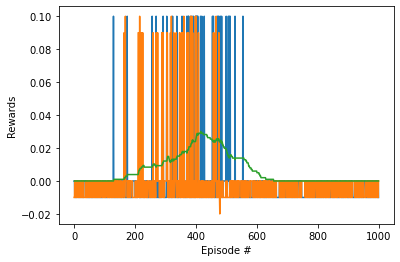

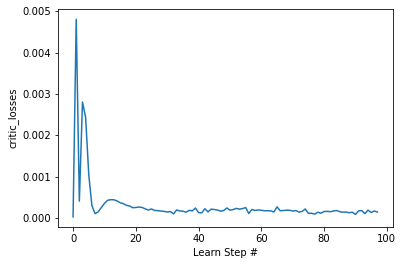

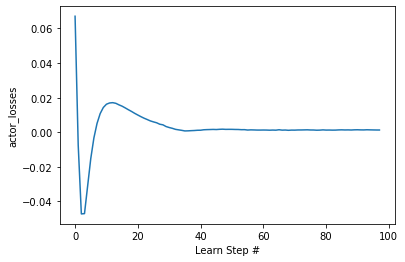

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.5
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001
Running on device :  cpu
Episode 0 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.998 || 0.068 seconds, mem : 14


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.959 || 0.295 seconds, mem : 298


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.921 || 2.001 seconds, mem : 582


Episode 60 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.885 || 0.795 seconds, mem : 866


Episode 80 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.850 || 0.693 seconds, mem : 1150
Episode 82 with 44 steps || Reward : [0.1  0.09] || avg reward :  0.001 || Noise  0.847 || 0.296 seconds, mem : 1209


Episode 100 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.817 || 0.486 seconds, mem : 1464
Episode 107 with 30 steps || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.806 || 0.131 seconds, mem : 1580


Episode 120 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.785 || 0.610 seconds, mem : 1765


Episode 140 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.754 || 0.674 seconds, mem : 2049


Episode 160 with 24 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.724 || 0.482 seconds, mem : 2346
Episode 163 with 31 steps || Reward : [0.   0.09] || avg reward :  0.003 || Noise  0.720 || 0.139 seconds, mem : 2405


Episode 180 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.003 || Noise  0.696 || 0.433 seconds, mem : 2651
Episode 185 with 31 steps || Reward : [0.   0.09] || avg reward :  0.003 || Noise  0.689 || 0.126 seconds, mem : 2739


Episode 190 with 31 steps || Reward : [0.   0.09] || avg reward :  0.004 || Noise  0.682 || 0.495 seconds, mem : 2827


Episode 200 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.004 || Noise  0.669 || 0.434 seconds, mem : 2969
Episode 207 with 30 steps || Reward : [0.   0.09] || avg reward :  0.004 || Noise  0.659 || 0.120 seconds, mem : 3084


Episode 210 with 29 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.655 || 0.525 seconds, mem : 3142


Episode 220 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.005 || Noise  0.642 || 0.505 seconds, mem : 3284
Episode 224 with 30 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.637 || 0.138 seconds, mem : 3357


Episode 237 with 29 steps || Reward : [0.   0.09] || avg reward :  0.006 || Noise  0.621 || 0.118 seconds, mem : 3557


Episode 240 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.006 || Noise  0.617 || 0.435 seconds, mem : 3600
Episode 245 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.007 || Noise  0.611 || 0.132 seconds, mem : 3690
Episode 247 with 29 steps || Reward : [0.   0.09] || avg reward :  0.008 || Noise  0.609 || 0.115 seconds, mem : 3733


Episode 256 with 32 steps || Reward : [0.   0.09] || avg reward :  0.009 || Noise  0.598 || 0.122 seconds, mem : 3879
Episode 259 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.010 || Noise  0.594 || 0.164 seconds, mem : 3940


Episode 260 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.010 || Noise  0.593 || 0.435 seconds, mem : 3954
Episode 264 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.588 || 0.140 seconds, mem : 4028
Episode 266 with 43 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.586 || 0.199 seconds, mem : 4085
Episode 268 with 31 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.584 || 0.125 seconds, mem : 4130


Episode 274 with 30 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.577 || 0.121 seconds, mem : 4231


Episode 280 with 30 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.570 || 0.631 seconds, mem : 4332
Episode 287 with 31 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.562 || 0.181 seconds, mem : 4448


Episode 291 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.557 || 0.140 seconds, mem : 4521
Episode 293 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.555 || 0.147 seconds, mem : 4566
Episode 297 with 32 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.551 || 0.169 seconds, mem : 4640


Episode 300 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.016 || Noise  0.547 || 0.438 seconds, mem : 4682
Episode 302 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.545 || 0.132 seconds, mem : 4726
Episode 305 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.542 || 0.163 seconds, mem : 4785
Episode 306 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.541 || 0.118 seconds, mem : 4815
Episode 307 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.540 || 0.134 seconds, mem : 4844
Episode 309 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.538 || 0.122 seconds, mem : 4889


Episode 312 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.534 || 0.129 seconds, mem : 4948
Episode 315 with 32 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.531 || 0.158 seconds, mem : 5008
Episode 318 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.528 || 0.139 seconds, mem : 5066


Episode 320 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.022 || Noise  0.526 || 0.467 seconds, mem : 5094
Episode 321 with 31 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.525 || 0.139 seconds, mem : 5125
Episode 329 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.517 || 0.137 seconds, mem : 5256


Episode 331 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.514 || 0.143 seconds, mem : 5301
Episode 333 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.512 || 0.128 seconds, mem : 5345
Episode 339 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.506 || 0.121 seconds, mem : 5447


Episode 340 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.025 || Noise  0.505 || 0.428 seconds, mem : 5461
Episode 348 with 32 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.497 || 0.131 seconds, mem : 5592


Episode 352 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.493 || 0.122 seconds, mem : 5673
Episode 355 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.490 || 0.131 seconds, mem : 5734
Episode 356 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.489 || 0.129 seconds, mem : 5766
Episode 357 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.488 || 0.147 seconds, mem : 5798


Episode 360 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.026 || Noise  0.485 || 0.448 seconds, mem : 5841
Episode 365 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.026 || Noise  0.481 || 0.133 seconds, mem : 5931
Episode 368 with 32 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.478 || 0.138 seconds, mem : 5991


Episode 370 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.476 || 0.508 seconds, mem : 6042
Episode 371 with 32 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.475 || 0.140 seconds, mem : 6074
Episode 372 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.028 || Noise  0.474 || 0.146 seconds, mem : 6107
Episode 374 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.472 || 0.126 seconds, mem : 6156
Episode 378 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.468 || 0.131 seconds, mem : 6236


Episode 380 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.028 || Noise  0.466 || 0.441 seconds, mem : 6264
Episode 382 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.029 || Noise  0.465 || 0.153 seconds, mem : 6311
Episode 388 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.029 || Noise  0.459 || 0.134 seconds, mem : 6415


Episode 392 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.455 || 0.141 seconds, mem : 6491


Episode 400 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.027 || Noise  0.448 || 0.444 seconds, mem : 6634
Episode 402 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.446 || 0.151 seconds, mem : 6700
Episode 408 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.441 || 0.126 seconds, mem : 6804
Episode 409 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.440 || 0.137 seconds, mem : 6837


Episode 410 with 31 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.439 || 0.737 seconds, mem : 6868
Episode 411 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.438 || 0.141 seconds, mem : 6900
Episode 412 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.437 || 0.155 seconds, mem : 6933
Episode 416 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.434 || 0.172 seconds, mem : 7022
Episode 417 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.433 || 0.157 seconds, mem : 7055


Episode 420 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.027 || Noise  0.430 || 0.456 seconds, mem : 7097


Episode 425 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.426 || 0.137 seconds, mem : 7187
Episode 427 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.424 || 0.132 seconds, mem : 7233
Episode 430 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.422 || 0.505 seconds, mem : 7298


Episode 433 with 34 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.419 || 0.150 seconds, mem : 7361
Episode 434 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.028 || Noise  0.419 || 0.129 seconds, mem : 7394
Episode 436 with 33 steps || Reward : [ 0.1  -0.02] || avg reward :  0.029 || Noise  0.417 || 0.148 seconds, mem : 7441
Episode 439 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.414 || 0.125 seconds, mem : 7502


Episode 440 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.414 || 0.522 seconds, mem : 7534
Episode 441 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.413 || 0.136 seconds, mem : 7567
Episode 445 with 30 steps || Reward : [0.   0.09] || avg reward :  0.032 || Noise  0.409 || 0.122 seconds, mem : 7640


Episode 454 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.402 || 0.163 seconds, mem : 7798


Episode 460 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.397 || 0.595 seconds, mem : 7902
Episode 461 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.397 || 0.171 seconds, mem : 7934
Episode 469 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.030 || Noise  0.390 || 0.139 seconds, mem : 8067


Episode 478 with 36 steps || Reward : [0.1  0.09] || avg reward :  0.026 || Noise  0.383 || 0.156 seconds, mem : 8217


Episode 480 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.026 || Noise  0.382 || 0.481 seconds, mem : 8245


Episode 491 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.373 || 0.177 seconds, mem : 8421
Episode 492 with 39 steps || Reward : [0.1  0.09] || avg reward :  0.025 || Noise  0.373 || 0.188 seconds, mem : 8460


Episode 500 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.025 || Noise  0.367 || 0.455 seconds, mem : 8574
Episode 507 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.362 || 0.157 seconds, mem : 8711


Episode 510 with 52 steps || Reward : [0.09 0.1 ] || avg reward :  0.023 || Noise  0.360 || 0.994 seconds, mem : 8791


Episode 520 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.019 || Noise  0.352 || 0.436 seconds, mem : 8933
Episode 521 with 36 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.352 || 0.182 seconds, mem : 8969
Episode 529 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.346 || 0.131 seconds, mem : 9102


Episode 540 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.013 || Noise  0.339 || 0.452 seconds, mem : 9258
Episode 546 with 52 steps || Reward : [0.09 0.1 ] || avg reward :  0.012 || Noise  0.335 || 0.210 seconds, mem : 9381
Episode 548 with 52 steps || Reward : [0.09 0.1 ] || avg reward :  0.013 || Noise  0.333 || 0.231 seconds, mem : 9447


Episode 559 with 65 steps || Reward : [0.2  0.09] || avg reward :  0.014 || Noise  0.326 || 0.283 seconds, mem : 9654


Episode 560 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.013 || Noise  0.325 || 0.430 seconds, mem : 9668
Episode 566 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.013 || Noise  0.321 || 0.137 seconds, mem : 9770


Episode 571 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.318 || 0.131 seconds, mem : 9857


Episode 580 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.312 || 0.444 seconds, mem : 9985


Episode 600 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.010 || Noise  0.300 || 0.509 seconds, mem : 10269


Episode 620 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.008 || Noise  0.288 || 0.457 seconds, mem : 10553


Episode 640 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.006 || Noise  0.277 || 0.644 seconds, mem : 10837


Episode 660 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.266 || 0.547 seconds, mem : 11121


Episode 673 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.001 || Noise  0.259 || 0.143 seconds, mem : 11323


Episode 680 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.256 || 0.468 seconds, mem : 11422
Episode 681 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.002 || Noise  0.255 || 0.157 seconds, mem : 11456


Episode 700 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.246 || 0.616 seconds, mem : 11725


Episode 720 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.236 || 0.676 seconds, mem : 12009


Episode 740 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.227 || 0.447 seconds, mem : 12293


Episode 760 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.218 || 0.539 seconds, mem : 12577


Episode 780 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.209 || 0.453 seconds, mem : 12861


Episode 800 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.201 || 0.430 seconds, mem : 13145


Episode 820 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.193 || 0.443 seconds, mem : 13429


Episode 840 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.186 || 0.434 seconds, mem : 13713


Episode 860 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.178 || 0.443 seconds, mem : 13997


Episode 880 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.171 || 0.437 seconds, mem : 14281


Episode 900 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.165 || 0.442 seconds, mem : 14565


Episode 920 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.158 || 0.489 seconds, mem : 14849


Episode 940 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.152 || 0.455 seconds, mem : 15133


Episode 958 with 49 steps || Reward : [ 0.1  -0.01] || avg reward :  0.001 || Noise  0.147 || 0.211 seconds, mem : 15420


Episode 960 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.146 || 0.471 seconds, mem : 15448


Episode 980 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.140 || 0.508 seconds, mem : 15728


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.5
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


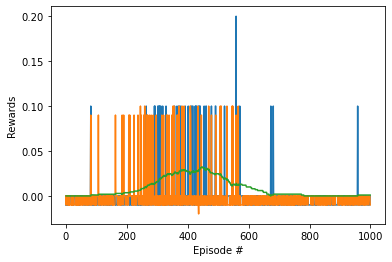

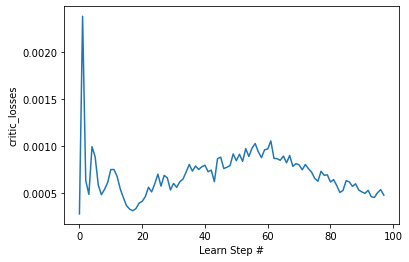

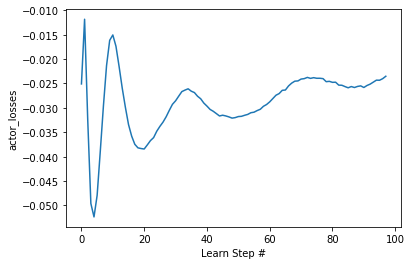

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.7
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
Running on device :  cpu
Episode 0 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.080 seconds, mem : 15


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.959 || 0.306 seconds, mem : 299


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.921 || 1.097 seconds, mem : 583


Episode 60 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.885 || 0.524 seconds, mem : 867


Episode 80 with 31 steps || Reward : [0.   0.09] || avg reward :  0.001 || Noise  0.850 || 0.602 seconds, mem : 1167


Episode 100 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.817 || 0.552 seconds, mem : 1451


Episode 120 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.785 || 0.511 seconds, mem : 1735


Episode 140 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.754 || 0.479 seconds, mem : 2019


Episode 160 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.724 || 0.482 seconds, mem : 2303
Episode 161 with 29 steps || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.723 || 0.150 seconds, mem : 2332


Episode 169 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.003 || Noise  0.712 || 0.189 seconds, mem : 2463


Episode 180 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.696 || 0.468 seconds, mem : 2619


Episode 183 with 30 steps || Reward : [0.   0.09] || avg reward :  0.003 || Noise  0.692 || 0.152 seconds, mem : 2678


Episode 200 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.669 || 0.501 seconds, mem : 2919


Episode 215 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.004 || Noise  0.649 || 0.131 seconds, mem : 3145


Episode 220 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.004 || Noise  0.642 || 0.444 seconds, mem : 3216
Episode 222 with 32 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.640 || 0.136 seconds, mem : 3262
Episode 225 with 30 steps || Reward : [0.   0.09] || avg reward :  0.006 || Noise  0.636 || 0.153 seconds, mem : 3321
Episode 228 with 31 steps || Reward : [0.   0.09] || avg reward :  0.007 || Noise  0.632 || 0.137 seconds, mem : 3381


Episode 230 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.008 || Noise  0.630 || 0.554 seconds, mem : 3429


Episode 240 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.008 || Noise  0.617 || 0.552 seconds, mem : 3571
Episode 241 with 41 steps || Reward : [0.   0.09] || avg reward :  0.008 || Noise  0.616 || 0.303 seconds, mem : 3612
Episode 244 with 31 steps || Reward : [0.   0.09] || avg reward :  0.009 || Noise  0.612 || 0.167 seconds, mem : 3671


Episode 250 with 30 steps || Reward : [0.   0.09] || avg reward :  0.010 || Noise  0.605 || 0.627 seconds, mem : 3780


Episode 260 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.010 || Noise  0.593 || 0.665 seconds, mem : 3922
Episode 264 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.010 || Noise  0.588 || 0.152 seconds, mem : 3993


Episode 280 with 32 steps || Reward : [0.   0.09] || avg reward :  0.010 || Noise  0.570 || 0.588 seconds, mem : 4245
Episode 281 with 29 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.569 || 0.132 seconds, mem : 4274


Episode 296 with 31 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.552 || 0.155 seconds, mem : 4504


Episode 300 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.011 || Noise  0.547 || 0.550 seconds, mem : 4561
Episode 306 with 31 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.541 || 0.170 seconds, mem : 4663


Episode 313 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.013 || Noise  0.533 || 0.349 seconds, mem : 4778


Episode 320 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.526 || 0.835 seconds, mem : 4878
Episode 323 with 31 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.523 || 0.166 seconds, mem : 4937


Episode 340 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.009 || Noise  0.505 || 0.535 seconds, mem : 5181
Episode 342 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.009 || Noise  0.503 || 0.162 seconds, mem : 5222
Episode 346 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.009 || Noise  0.499 || 0.162 seconds, mem : 5295
Episode 347 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.010 || Noise  0.498 || 0.121 seconds, mem : 5324
Episode 348 with 32 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.497 || 0.144 seconds, mem : 5356


Episode 351 with 30 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.494 || 0.179 seconds, mem : 5414
Episode 353 with 30 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.492 || 0.220 seconds, mem : 5464


Episode 357 with 32 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.488 || 0.169 seconds, mem : 5538


Episode 360 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.013 || Noise  0.485 || 0.910 seconds, mem : 5580
Episode 361 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.014 || Noise  0.484 || 0.197 seconds, mem : 5614
Episode 364 with 30 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.482 || 0.149 seconds, mem : 5673


Episode 372 with 34 steps || Reward : [0.   0.09] || avg reward :  0.015 || Noise  0.474 || 0.148 seconds, mem : 5811
Episode 375 with 43 steps || Reward : [0.1  0.09] || avg reward :  0.016 || Noise  0.471 || 0.192 seconds, mem : 5882
Episode 379 with 30 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.467 || 0.136 seconds, mem : 5955


Episode 380 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.016 || Noise  0.466 || 0.439 seconds, mem : 5970
Episode 383 with 31 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.464 || 0.145 seconds, mem : 6029


Episode 393 with 32 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.454 || 0.127 seconds, mem : 6189


Episode 400 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.448 || 0.485 seconds, mem : 6300
Episode 402 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.446 || 0.106 seconds, mem : 6340
Episode 404 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.444 || 0.129 seconds, mem : 6384
Episode 406 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.443 || 0.126 seconds, mem : 6428


Episode 411 with 31 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.438 || 0.145 seconds, mem : 6532
Episode 416 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.020 || Noise  0.434 || 0.130 seconds, mem : 6619


Episode 420 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.020 || Noise  0.430 || 0.443 seconds, mem : 6676
Episode 424 with 44 steps || Reward : [-0.01  0.1 ] || avg reward :  0.020 || Noise  0.427 || 0.196 seconds, mem : 6762


Episode 439 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.021 || Noise  0.414 || 0.119 seconds, mem : 6989


Episode 440 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.414 || 0.637 seconds, mem : 7020
Episode 441 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.413 || 0.164 seconds, mem : 7053
Episode 444 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.410 || 0.135 seconds, mem : 7113


Episode 458 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.399 || 0.129 seconds, mem : 7329


Episode 460 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.018 || Noise  0.397 || 0.450 seconds, mem : 7357
Episode 463 with 31 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.395 || 0.142 seconds, mem : 7417
Episode 468 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.018 || Noise  0.391 || 0.224 seconds, mem : 7502


Episode 474 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.386 || 0.126 seconds, mem : 7603
Episode 477 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.384 || 0.152 seconds, mem : 7664


Episode 480 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.017 || Noise  0.382 || 0.447 seconds, mem : 7707
Episode 482 with 52 steps || Reward : [0.09 0.1 ] || avg reward :  0.018 || Noise  0.380 || 0.229 seconds, mem : 7773


Episode 497 with 33 steps || Reward : [ 0.1  -0.02] || avg reward :  0.018 || Noise  0.369 || 0.158 seconds, mem : 8004


Episode 500 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.017 || Noise  0.367 || 0.514 seconds, mem : 8047
Episode 506 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.015 || Noise  0.362 || 0.183 seconds, mem : 8145


Episode 513 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.357 || 0.156 seconds, mem : 8265


Episode 520 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.014 || Noise  0.352 || 0.450 seconds, mem : 8365
Episode 529 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.346 || 0.146 seconds, mem : 8512


Episode 540 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.339 || 0.491 seconds, mem : 8668


Episode 560 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.009 || Noise  0.325 || 0.430 seconds, mem : 8957


Episode 580 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.005 || Noise  0.312 || 0.434 seconds, mem : 9241


Episode 600 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.300 || 0.480 seconds, mem : 9525


Episode 620 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.288 || 0.455 seconds, mem : 9809


Episode 640 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.277 || 0.434 seconds, mem : 10093


Episode 660 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.266 || 0.427 seconds, mem : 10377


Episode 680 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.256 || 0.422 seconds, mem : 10661


Episode 700 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.246 || 0.413 seconds, mem : 10945


Episode 720 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.236 || 0.423 seconds, mem : 11229


Episode 740 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.227 || 0.416 seconds, mem : 11513


Episode 760 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.218 || 0.423 seconds, mem : 11797


Episode 780 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.209 || 0.531 seconds, mem : 12081


Episode 800 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.201 || 0.424 seconds, mem : 12365


Episode 820 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.193 || 0.438 seconds, mem : 12649


Episode 840 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.186 || 0.427 seconds, mem : 12933


Episode 860 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.178 || 0.417 seconds, mem : 13217


Episode 880 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.171 || 0.414 seconds, mem : 13501


Episode 900 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.165 || 0.438 seconds, mem : 13785


Episode 920 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.158 || 0.416 seconds, mem : 14069


Episode 940 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.152 || 0.440 seconds, mem : 14353


Episode 960 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.146 || 0.442 seconds, mem : 14637


Episode 980 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.140 || 0.422 seconds, mem : 14921


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.7
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


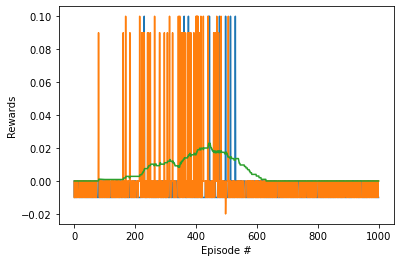

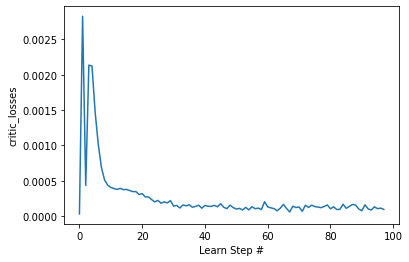

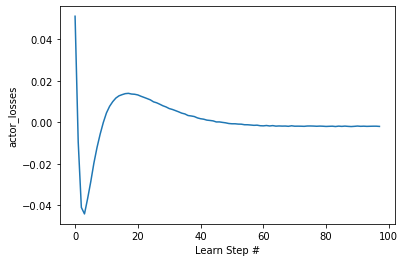

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.7
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001
Running on device :  cpu
Episode 0 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.070 seconds, mem : 14


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.959 || 0.299 seconds, mem : 298


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.921 || 0.777 seconds, mem : 582


Episode 60 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.885 || 0.494 seconds, mem : 866


Episode 80 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.850 || 0.581 seconds, mem : 1150
Episode 87 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.001 || Noise  0.838 || 0.151 seconds, mem : 1268


Episode 100 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.817 || 0.450 seconds, mem : 1453


Episode 120 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.785 || 0.449 seconds, mem : 1737


Episode 140 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.754 || 0.440 seconds, mem : 2021


Episode 160 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.724 || 0.429 seconds, mem : 2305


Episode 180 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.696 || 0.433 seconds, mem : 2603


Episode 196 with 31 steps || Reward : [0.   0.09] || avg reward :  0.001 || Noise  0.674 || 0.130 seconds, mem : 2847


Episode 200 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.669 || 0.447 seconds, mem : 2904
Episode 209 with 31 steps || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.657 || 0.123 seconds, mem : 3049


Episode 220 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.642 || 0.445 seconds, mem : 3205
Episode 222 with 32 steps || Reward : [0.   0.09] || avg reward :  0.003 || Noise  0.640 || 0.129 seconds, mem : 3251
Episode 228 with 29 steps || Reward : [0.   0.09] || avg reward :  0.004 || Noise  0.632 || 0.120 seconds, mem : 3351


Episode 236 with 29 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.622 || 0.114 seconds, mem : 3480


Episode 240 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.005 || Noise  0.617 || 0.436 seconds, mem : 3537
Episode 245 with 29 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.611 || 0.141 seconds, mem : 3623


Episode 255 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.006 || Noise  0.599 || 0.105 seconds, mem : 3777


Episode 260 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.006 || Noise  0.593 || 0.430 seconds, mem : 3848
Episode 265 with 31 steps || Reward : [0.   0.09] || avg reward :  0.007 || Noise  0.587 || 0.122 seconds, mem : 3936
Episode 269 with 30 steps || Reward : [0.   0.09] || avg reward :  0.008 || Noise  0.582 || 0.139 seconds, mem : 4008


Episode 272 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.579 || 0.118 seconds, mem : 4066
Episode 273 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.578 || 0.125 seconds, mem : 4097
Episode 274 with 31 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.577 || 0.158 seconds, mem : 4128
Episode 276 with 31 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.574 || 0.120 seconds, mem : 4173


Episode 280 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.570 || 0.418 seconds, mem : 4230
Episode 282 with 30 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.567 || 0.133 seconds, mem : 4274
Episode 285 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.564 || 0.130 seconds, mem : 4332
Episode 287 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.562 || 0.125 seconds, mem : 4378
Episode 288 with 30 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.561 || 0.132 seconds, mem : 4408


Episode 290 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.558 || 0.513 seconds, mem : 4453
Episode 292 with 29 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.556 || 0.116 seconds, mem : 4497
Episode 296 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.552 || 0.135 seconds, mem : 4571
Episode 297 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.551 || 0.118 seconds, mem : 4601
Episode 298 with 32 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.550 || 0.145 seconds, mem : 4633


Episode 300 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.020 || Noise  0.547 || 0.437 seconds, mem : 4661
Episode 301 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.546 || 0.142 seconds, mem : 4692
Episode 303 with 35 steps || Reward : [0.1  0.09] || avg reward :  0.022 || Noise  0.544 || 0.150 seconds, mem : 4741
Episode 306 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.541 || 0.151 seconds, mem : 4799
Episode 307 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.540 || 0.135 seconds, mem : 4831


Episode 318 with 32 steps || Reward : [0.1  0.09] || avg reward :  0.024 || Noise  0.528 || 0.130 seconds, mem : 5004
Episode 319 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.527 || 0.117 seconds, mem : 5035


Episode 320 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.025 || Noise  0.526 || 0.425 seconds, mem : 5049
Episode 322 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.524 || 0.139 seconds, mem : 5105
Episode 325 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.521 || 0.142 seconds, mem : 5164
Episode 328 with 25 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.518 || 0.109 seconds, mem : 5218


Episode 331 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.027 || Noise  0.514 || 0.135 seconds, mem : 5285
Episode 332 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.028 || Noise  0.513 || 0.137 seconds, mem : 5319
Episode 333 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.512 || 0.130 seconds, mem : 5349
Episode 335 with 30 steps || Reward : [0.   0.09] || avg reward :  0.030 || Noise  0.510 || 0.118 seconds, mem : 5393
Episode 337 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.508 || 0.124 seconds, mem : 5438


Episode 340 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.030 || Noise  0.505 || 0.417 seconds, mem : 5480
Episode 347 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.030 || Noise  0.498 || 0.143 seconds, mem : 5596
Episode 348 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.497 || 0.153 seconds, mem : 5627
Episode 349 with 31 steps || Reward : [0.   0.09] || avg reward :  0.032 || Noise  0.496 || 0.167 seconds, mem : 5658


Episode 360 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.031 || Noise  0.485 || 0.511 seconds, mem : 5817
Episode 361 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.032 || Noise  0.484 || 0.143 seconds, mem : 5851
Episode 364 with 31 steps || Reward : [0.   0.09] || avg reward :  0.033 || Noise  0.482 || 0.132 seconds, mem : 5910
Episode 366 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.033 || Noise  0.480 || 0.126 seconds, mem : 5957
Episode 367 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.479 || 0.137 seconds, mem : 5988


Episode 368 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.035 || Noise  0.478 || 0.148 seconds, mem : 6022
Episode 369 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.035 || Noise  0.477 || 0.129 seconds, mem : 6053
Episode 371 with 39 steps || Reward : [0.1  0.09] || avg reward :  0.036 || Noise  0.475 || 0.162 seconds, mem : 6106


Episode 376 with 30 steps || Reward : [0.   0.09] || avg reward :  0.033 || Noise  0.470 || 0.126 seconds, mem : 6197
Episode 380 with 41 steps || Reward : [0.1  0.09] || avg reward :  0.034 || Noise  0.466 || 0.538 seconds, mem : 6280


Episode 383 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.464 || 0.151 seconds, mem : 6345
Episode 384 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.035 || Noise  0.463 || 0.134 seconds, mem : 6375
Episode 386 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.035 || Noise  0.461 || 0.136 seconds, mem : 6420


Episode 390 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.033 || Noise  0.457 || 0.536 seconds, mem : 6494
Episode 393 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.033 || Noise  0.454 || 0.141 seconds, mem : 6552


Episode 400 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.030 || Noise  0.448 || 0.430 seconds, mem : 6656
Episode 403 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.445 || 0.135 seconds, mem : 6721


Episode 412 with 41 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.437 || 0.181 seconds, mem : 6875
Episode 415 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.435 || 0.133 seconds, mem : 6935


Episode 420 with 39 steps || Reward : [0.1  0.09] || avg reward :  0.029 || Noise  0.430 || 0.583 seconds, mem : 7030
Episode 426 with 29 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.425 || 0.118 seconds, mem : 7129


Episode 432 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.420 || 0.121 seconds, mem : 7229
Episode 434 with 42 steps || Reward : [0.09 0.  ] || avg reward :  0.025 || Noise  0.419 || 0.171 seconds, mem : 7285
Episode 437 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.025 || Noise  0.416 || 0.137 seconds, mem : 7345


Episode 440 with 25 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.414 || 0.480 seconds, mem : 7398
Episode 442 with 39 steps || Reward : [0.1  0.09] || avg reward :  0.027 || Noise  0.412 || 0.183 seconds, mem : 7454
Episode 445 with 32 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.409 || 0.141 seconds, mem : 7514


Episode 453 with 22 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.403 || 0.088 seconds, mem : 7635
Episode 454 with 25 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.402 || 0.097 seconds, mem : 7660
Episode 456 with 43 steps || Reward : [0.09 0.1 ] || avg reward :  0.028 || Noise  0.401 || 0.183 seconds, mem : 7717


Episode 460 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.028 || Noise  0.397 || 0.432 seconds, mem : 7774
Episode 461 with 24 steps || Reward : [-0.01  0.1 ] || avg reward :  0.028 || Noise  0.397 || 0.114 seconds, mem : 7798


Episode 474 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.386 || 0.126 seconds, mem : 7999


Episode 480 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.021 || Noise  0.382 || 0.421 seconds, mem : 8089


Episode 500 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.016 || Noise  0.367 || 0.434 seconds, mem : 8376
Episode 502 with 55 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.365 || 0.223 seconds, mem : 8445
Episode 509 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.360 || 0.130 seconds, mem : 8564


Episode 512 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.017 || Noise  0.358 || 0.112 seconds, mem : 8620


Episode 520 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.015 || Noise  0.352 || 0.420 seconds, mem : 8734


Episode 540 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.010 || Noise  0.339 || 0.422 seconds, mem : 9018


Episode 560 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.005 || Noise  0.325 || 0.407 seconds, mem : 9302


Episode 580 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.003 || Noise  0.312 || 0.430 seconds, mem : 9585


Episode 600 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.003 || Noise  0.300 || 0.418 seconds, mem : 9869


Episode 620 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.288 || 0.522 seconds, mem : 10153


Episode 640 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.277 || 0.584 seconds, mem : 10437


Episode 660 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.266 || 0.428 seconds, mem : 10721


Episode 680 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.256 || 0.518 seconds, mem : 11005


Episode 700 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.246 || 0.440 seconds, mem : 11289


Episode 720 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.236 || 0.500 seconds, mem : 11573


Episode 740 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.227 || 0.483 seconds, mem : 11857


Episode 760 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.218 || 0.418 seconds, mem : 12141


Episode 780 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.209 || 0.506 seconds, mem : 12425


Episode 800 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.201 || 0.417 seconds, mem : 12709


Episode 820 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.193 || 0.432 seconds, mem : 12993


Episode 840 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.186 || 0.421 seconds, mem : 13277


Episode 860 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.178 || 0.433 seconds, mem : 13561


Episode 880 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.171 || 0.418 seconds, mem : 13845


Episode 900 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.165 || 0.522 seconds, mem : 14129


Episode 920 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.158 || 0.426 seconds, mem : 14413


Episode 940 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.152 || 0.418 seconds, mem : 14697


Episode 960 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.146 || 0.486 seconds, mem : 14981


Episode 980 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.140 || 0.433 seconds, mem : 15265


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.7
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


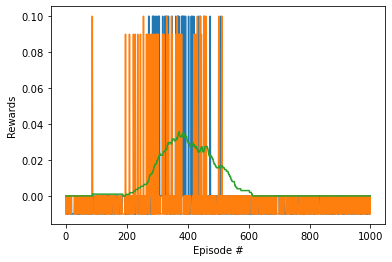

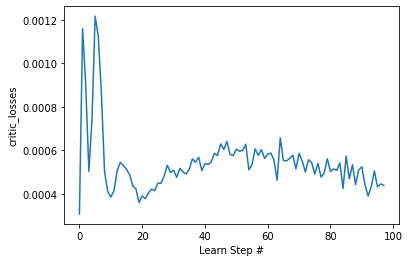

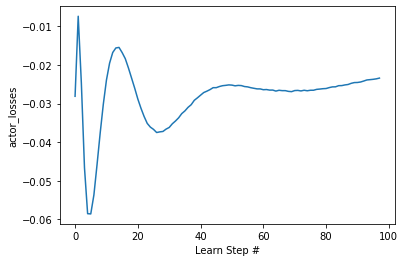

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.4
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
Running on device :  cpu


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 0 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.084 seconds, mem : 14


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.959 || 0.328 seconds, mem : 298


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.921 || 1.726 seconds, mem : 582


Episode 60 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.885 || 0.551 seconds, mem : 866


Episode 75 with 30 steps || Reward : [0.   0.09] || avg reward :  0.001 || Noise  0.859 || 0.126 seconds, mem : 1095


Episode 80 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.850 || 0.486 seconds, mem : 1166


Episode 100 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.817 || 0.469 seconds, mem : 1450


Episode 117 with 31 steps || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.790 || 0.150 seconds, mem : 1708


Episode 120 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.785 || 0.531 seconds, mem : 1750


Episode 140 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.754 || 0.499 seconds, mem : 2037
Episode 144 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.003 || Noise  0.748 || 0.233 seconds, mem : 2109


Episode 156 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.004 || Noise  0.730 || 0.165 seconds, mem : 2297


Episode 160 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.004 || Noise  0.724 || 0.623 seconds, mem : 2354
Episode 161 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.005 || Noise  0.723 || 0.198 seconds, mem : 2384
Episode 164 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.006 || Noise  0.719 || 0.137 seconds, mem : 2439


Episode 171 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.007 || Noise  0.709 || 0.141 seconds, mem : 2568


Episode 174 with 31 steps || Reward : [0.   0.09] || avg reward :  0.008 || Noise  0.704 || 0.171 seconds, mem : 2631
Episode 175 with 31 steps || Reward : [0.   0.09] || avg reward :  0.008 || Noise  0.703 || 0.164 seconds, mem : 2662
Episode 177 with 32 steps || Reward : [0.   0.09] || avg reward :  0.009 || Noise  0.700 || 0.200 seconds, mem : 2708


Episode 180 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.696 || 0.602 seconds, mem : 2768
Episode 182 with 29 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.693 || 0.143 seconds, mem : 2811
Episode 187 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.012 || Noise  0.686 || 0.149 seconds, mem : 2894


Episode 190 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.682 || 0.682 seconds, mem : 2954


Episode 200 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.013 || Noise  0.669 || 0.525 seconds, mem : 3096
Episode 207 with 31 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.659 || 0.167 seconds, mem : 3211


Episode 216 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.014 || Noise  0.648 || 0.126 seconds, mem : 3361


Episode 220 with 36 steps || Reward : [0.   0.09] || avg reward :  0.014 || Noise  0.642 || 0.617 seconds, mem : 3439
Episode 229 with 42 steps || Reward : [0.1  0.09] || avg reward :  0.015 || Noise  0.631 || 0.176 seconds, mem : 3594


Episode 230 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.016 || Noise  0.630 || 0.522 seconds, mem : 3625
Episode 231 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.628 || 0.141 seconds, mem : 3656
Episode 235 with 32 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.623 || 0.131 seconds, mem : 3730


Episode 240 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.018 || Noise  0.617 || 0.441 seconds, mem : 3801
Episode 242 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.019 || Noise  0.615 || 0.139 seconds, mem : 3848
Episode 247 with 33 steps || Reward : [ 0.1  -0.02] || avg reward :  0.019 || Noise  0.609 || 0.142 seconds, mem : 3938
Episode 248 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.607 || 0.133 seconds, mem : 3968


Episode 253 with 29 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.601 || 0.126 seconds, mem : 4054


Episode 260 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.020 || Noise  0.593 || 0.428 seconds, mem : 4154
Episode 262 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.591 || 0.130 seconds, mem : 4199
Episode 264 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.588 || 0.145 seconds, mem : 4246
Episode 265 with 29 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.587 || 0.127 seconds, mem : 4275


Episode 272 with 31 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.579 || 0.130 seconds, mem : 4391
Episode 273 with 43 steps || Reward : [0.1  0.09] || avg reward :  0.022 || Noise  0.578 || 0.169 seconds, mem : 4434
Episode 274 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.577 || 0.146 seconds, mem : 4467


Episode 280 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.019 || Noise  0.570 || 0.435 seconds, mem : 4552
Episode 283 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.566 || 0.151 seconds, mem : 4627
Episode 286 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.563 || 0.128 seconds, mem : 4686


Episode 292 with 29 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.556 || 0.121 seconds, mem : 4786
Episode 295 with 25 steps || Reward : [-0.01  0.1 ] || avg reward :  0.020 || Noise  0.553 || 0.233 seconds, mem : 4840
Episode 299 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.548 || 0.124 seconds, mem : 4912


Episode 300 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.021 || Noise  0.547 || 0.460 seconds, mem : 4927
Episode 305 with 32 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.542 || 0.143 seconds, mem : 5015
Episode 306 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.023 || Noise  0.541 || 0.116 seconds, mem : 5044
Episode 308 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.539 || 0.132 seconds, mem : 5089


Episode 310 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.537 || 0.507 seconds, mem : 5140
Episode 312 with 42 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.534 || 0.181 seconds, mem : 5196
Episode 315 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.531 || 0.138 seconds, mem : 5255
Episode 319 with 29 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.527 || 0.134 seconds, mem : 5327


Episode 320 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.526 || 0.511 seconds, mem : 5357
Episode 323 with 32 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.523 || 0.138 seconds, mem : 5417
Episode 324 with 31 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.522 || 0.126 seconds, mem : 5448
Episode 328 with 31 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.518 || 0.138 seconds, mem : 5534


Episode 331 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.514 || 0.151 seconds, mem : 5595
Episode 332 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.513 || 0.126 seconds, mem : 5626
Episode 333 with 31 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.512 || 0.140 seconds, mem : 5657
Episode 335 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.028 || Noise  0.510 || 0.122 seconds, mem : 5704
Episode 336 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.509 || 0.149 seconds, mem : 5737


Episode 338 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.030 || Noise  0.507 || 0.123 seconds, mem : 5781
Episode 340 with 30 steps || Reward : [0.   0.09] || avg reward :  0.031 || Noise  0.505 || 0.515 seconds, mem : 5825
Episode 342 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.503 || 0.134 seconds, mem : 5872


Episode 344 with 43 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.501 || 0.170 seconds, mem : 5929
Episode 345 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.033 || Noise  0.500 || 0.135 seconds, mem : 5961
Episode 348 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.497 || 0.130 seconds, mem : 6022


Episode 352 with 30 steps || Reward : [0.   0.09] || avg reward :  0.033 || Noise  0.493 || 0.129 seconds, mem : 6095
Episode 354 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.033 || Noise  0.491 || 0.142 seconds, mem : 6142
Episode 359 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.486 || 0.133 seconds, mem : 6231


Episode 360 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.035 || Noise  0.485 || 0.505 seconds, mem : 6261
Episode 363 with 31 steps || Reward : [0.   0.09] || avg reward :  0.035 || Noise  0.483 || 0.142 seconds, mem : 6320
Episode 367 with 41 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.479 || 0.185 seconds, mem : 6403
Episode 368 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.035 || Noise  0.478 || 0.242 seconds, mem : 6436


Episode 369 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.477 || 0.201 seconds, mem : 6467


Episode 372 with 42 steps || Reward : [0.1  0.09] || avg reward :  0.036 || Noise  0.474 || 0.211 seconds, mem : 6556
Episode 374 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.035 || Noise  0.472 || 0.202 seconds, mem : 6602
Episode 375 with 31 steps || Reward : [0.   0.09] || avg reward :  0.036 || Noise  0.471 || 0.156 seconds, mem : 6633
Episode 378 with 33 steps || Reward : [0.09 0.  ] || avg reward :  0.037 || Noise  0.468 || 0.166 seconds, mem : 6695


Episode 380 with 33 steps || Reward : [0.09 0.  ] || avg reward :  0.038 || Noise  0.466 || 0.543 seconds, mem : 6742
Episode 381 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.039 || Noise  0.465 || 0.131 seconds, mem : 6769
Episode 382 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.040 || Noise  0.465 || 0.149 seconds, mem : 6802
Episode 384 with 31 steps || Reward : [0.   0.09] || avg reward :  0.040 || Noise  0.463 || 0.126 seconds, mem : 6847
Episode 386 with 31 steps || Reward : [0.   0.09] || avg reward :  0.040 || Noise  0.461 || 0.122 seconds, mem : 6892
Episode 388 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.041 || Noise  0.459 || 0.136 seconds, mem : 6940


Episode 390 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.042 || Noise  0.457 || 0.489 seconds, mem : 6983
Episode 392 with 31 steps || Reward : [0.   0.09] || avg reward :  0.042 || Noise  0.455 || 0.127 seconds, mem : 7028
Episode 393 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.043 || Noise  0.454 || 0.140 seconds, mem : 7061
Episode 394 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.044 || Noise  0.453 || 0.158 seconds, mem : 7094
Episode 395 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.044 || Noise  0.453 || 0.126 seconds, mem : 7126
Episode 396 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.045 || Noise  0.452 || 0.145 seconds, mem : 7159


Episode 399 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.045 || Noise  0.449 || 0.144 seconds, mem : 7220
Episode 400 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.045 || Noise  0.448 || 0.454 seconds, mem : 7234
Episode 401 with 31 steps || Reward : [0.   0.09] || avg reward :  0.046 || Noise  0.447 || 0.142 seconds, mem : 7265


Episode 404 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.047 || Noise  0.444 || 0.303 seconds, mem : 7331
Episode 407 with 29 steps || Reward : [0.   0.09] || avg reward :  0.046 || Noise  0.442 || 0.134 seconds, mem : 7389


Episode 416 with 33 steps || Reward : [0.   0.09] || avg reward :  0.043 || Noise  0.434 || 0.133 seconds, mem : 7538
Episode 419 with 31 steps || Reward : [0.   0.09] || avg reward :  0.043 || Noise  0.431 || 0.135 seconds, mem : 7597


Episode 420 with 32 steps || Reward : [0.   0.09] || avg reward :  0.043 || Noise  0.430 || 0.494 seconds, mem : 7629
Episode 422 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.044 || Noise  0.429 || 0.127 seconds, mem : 7675


Episode 430 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.043 || Noise  0.422 || 0.490 seconds, mem : 7808
Episode 432 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.042 || Noise  0.420 || 0.142 seconds, mem : 7853
Episode 436 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.040 || Noise  0.417 || 0.148 seconds, mem : 7929


Episode 440 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.038 || Noise  0.414 || 0.459 seconds, mem : 7989
Episode 446 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.409 || 0.145 seconds, mem : 8093


Episode 451 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.405 || 0.150 seconds, mem : 8182
Episode 452 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.404 || 0.135 seconds, mem : 8215


Episode 460 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.033 || Noise  0.397 || 0.437 seconds, mem : 8341
Episode 463 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.033 || Noise  0.395 || 0.163 seconds, mem : 8401
Episode 469 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.390 || 0.141 seconds, mem : 8510


Episode 470 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.389 || 0.516 seconds, mem : 8543
Episode 471 with 26 steps || Reward : [ 0.1  -0.01] || avg reward :  0.033 || Noise  0.389 || 0.120 seconds, mem : 8569
Episode 472 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.033 || Noise  0.388 || 0.173 seconds, mem : 8602
Episode 473 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.387 || 0.249 seconds, mem : 8635


Episode 475 with 24 steps || Reward : [0.09 0.  ] || avg reward :  0.033 || Noise  0.386 || 0.202 seconds, mem : 8673
Episode 480 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.031 || Noise  0.382 || 0.644 seconds, mem : 8744


Episode 490 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.374 || 0.520 seconds, mem : 8910
Episode 493 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.025 || Noise  0.372 || 0.140 seconds, mem : 8968
Episode 495 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.370 || 0.235 seconds, mem : 9012


Episode 500 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.022 || Noise  0.367 || 0.450 seconds, mem : 9083


Episode 515 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.021 || Noise  0.356 || 0.116 seconds, mem : 9324
Episode 519 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.353 || 0.148 seconds, mem : 9399


Episode 520 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.019 || Noise  0.352 || 0.443 seconds, mem : 9413


Episode 540 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.015 || Noise  0.339 || 0.434 seconds, mem : 9697
Episode 548 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.333 || 0.130 seconds, mem : 9830


Episode 560 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.013 || Noise  0.325 || 0.434 seconds, mem : 10000


Episode 580 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.006 || Noise  0.312 || 0.466 seconds, mem : 10286


Episode 600 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.300 || 0.446 seconds, mem : 10570


Episode 620 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.288 || 0.554 seconds, mem : 10854


Episode 640 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.277 || 0.604 seconds, mem : 11138


Episode 660 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.266 || 0.464 seconds, mem : 11422


Episode 680 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.256 || 0.431 seconds, mem : 11706


Episode 700 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.246 || 0.437 seconds, mem : 11990


Episode 720 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.236 || 0.451 seconds, mem : 12274


Episode 740 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.227 || 0.446 seconds, mem : 12558


Episode 760 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.218 || 0.448 seconds, mem : 12842


Episode 780 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.209 || 0.445 seconds, mem : 13126


Episode 800 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.201 || 0.455 seconds, mem : 13410


Episode 820 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.193 || 0.490 seconds, mem : 13694


Episode 840 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.186 || 0.684 seconds, mem : 13978


Episode 860 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.178 || 0.455 seconds, mem : 14262


Episode 880 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.171 || 0.445 seconds, mem : 14546


Episode 900 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.165 || 0.784 seconds, mem : 14830


Episode 920 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.158 || 0.506 seconds, mem : 15114


Episode 940 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.152 || 0.539 seconds, mem : 15398


Episode 960 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.146 || 0.530 seconds, mem : 15682


Episode 980 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.140 || 0.468 seconds, mem : 15966


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.4
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


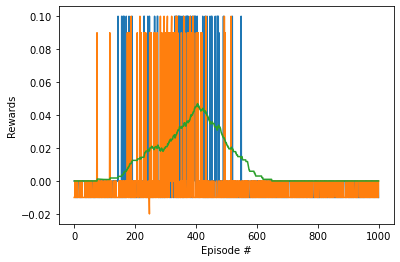

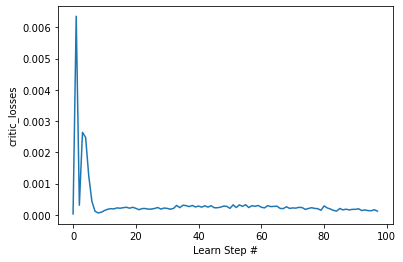

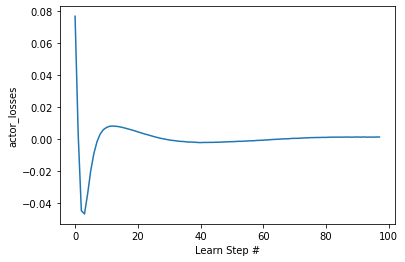

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.4
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001
Running on device :  cpu


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 0 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.998 || 0.131 seconds, mem : 14


Until buffer filled batches are smaller (256 vs. later 512)
Episode 20 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.959 || 0.321 seconds, mem : 298


Until buffer filled batches are smaller (256 vs. later 512)


Episode 40 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.921 || 1.398 seconds, mem : 582


Episode 60 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.885 || 0.583 seconds, mem : 866


Episode 80 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.850 || 0.452 seconds, mem : 1150


Episode 100 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.817 || 0.461 seconds, mem : 1434


Episode 120 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.785 || 0.440 seconds, mem : 1726


Episode 140 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.754 || 0.595 seconds, mem : 2010


Episode 154 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.001 || Noise  0.733 || 0.232 seconds, mem : 2247


Episode 160 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.724 || 0.527 seconds, mem : 2332


Episode 180 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.696 || 0.451 seconds, mem : 2616
Episode 181 with 31 steps || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.695 || 0.146 seconds, mem : 2647


Episode 194 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.003 || Noise  0.677 || 0.102 seconds, mem : 2844
Episode 198 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.004 || Noise  0.671 || 0.137 seconds, mem : 2918


Episode 200 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.004 || Noise  0.669 || 0.443 seconds, mem : 2946
Episode 205 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.005 || Noise  0.662 || 0.140 seconds, mem : 3034


Episode 220 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.006 || Noise  0.642 || 0.504 seconds, mem : 3263


Episode 240 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.006 || Noise  0.617 || 0.435 seconds, mem : 3546
Episode 243 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.007 || Noise  0.614 || 0.166 seconds, mem : 3605


Episode 252 with 30 steps || Reward : [0.   0.09] || avg reward :  0.008 || Noise  0.603 || 0.124 seconds, mem : 3748
Episode 256 with 31 steps || Reward : [0.1  0.09] || avg reward :  0.008 || Noise  0.598 || 0.137 seconds, mem : 3822


Episode 260 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.008 || Noise  0.593 || 0.442 seconds, mem : 3879
Episode 261 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.592 || 0.137 seconds, mem : 3909
Episode 262 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.010 || Noise  0.591 || 0.132 seconds, mem : 3938
Episode 268 with 30 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.584 || 0.115 seconds, mem : 4039


Episode 278 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.012 || Noise  0.572 || 0.109 seconds, mem : 4195


Episode 280 with 30 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.570 || 0.511 seconds, mem : 4240
Episode 281 with 31 steps || Reward : [0.   0.09] || avg reward :  0.013 || Noise  0.569 || 0.139 seconds, mem : 4271
Episode 284 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.565 || 0.126 seconds, mem : 4331
Episode 285 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.564 || 0.117 seconds, mem : 4360


Episode 291 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.016 || Noise  0.557 || 0.162 seconds, mem : 4459
Episode 292 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.017 || Noise  0.556 || 0.127 seconds, mem : 4490
Episode 298 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.016 || Noise  0.550 || 0.107 seconds, mem : 4589
Episode 299 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.548 || 0.125 seconds, mem : 4620


Episode 300 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.017 || Noise  0.547 || 0.449 seconds, mem : 4634
Episode 303 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.544 || 0.141 seconds, mem : 4694
Episode 305 with 43 steps || Reward : [0.09 0.1 ] || avg reward :  0.017 || Noise  0.542 || 0.179 seconds, mem : 4751
Episode 308 with 30 steps || Reward : [0.   0.09] || avg reward :  0.018 || Noise  0.539 || 0.129 seconds, mem : 4810


Episode 311 with 29 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.535 || 0.133 seconds, mem : 4867
Episode 313 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.533 || 0.120 seconds, mem : 4911
Episode 317 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.529 || 0.142 seconds, mem : 4986
Episode 318 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.528 || 0.124 seconds, mem : 5017


Episode 320 with 30 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.526 || 0.504 seconds, mem : 5061


Episode 339 with 29 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.506 || 0.110 seconds, mem : 5362


Episode 340 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.505 || 0.505 seconds, mem : 5392
Episode 341 with 36 steps || Reward : [0.1  0.09] || avg reward :  0.025 || Noise  0.504 || 0.168 seconds, mem : 5428
Episode 342 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.503 || 0.130 seconds, mem : 5457
Episode 343 with 36 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.502 || 0.153 seconds, mem : 5493
Episode 349 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.027 || Noise  0.496 || 0.106 seconds, mem : 5590


Episode 351 with 31 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.494 || 0.156 seconds, mem : 5635
Episode 354 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.491 || 0.129 seconds, mem : 5692
Episode 357 with 31 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.488 || 0.138 seconds, mem : 5752


Episode 360 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.028 || Noise  0.485 || 0.456 seconds, mem : 5795
Episode 365 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.481 || 0.142 seconds, mem : 5888
Episode 366 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.480 || 0.122 seconds, mem : 5919
Episode 368 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.478 || 0.145 seconds, mem : 5964
Episode 369 with 32 steps || Reward : [0.   0.09] || avg reward :  0.029 || Noise  0.477 || 0.134 seconds, mem : 5996


Episode 371 with 23 steps || Reward : [-0.01  0.1 ] || avg reward :  0.030 || Noise  0.475 || 0.117 seconds, mem : 6033
Episode 376 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.470 || 0.137 seconds, mem : 6120
Episode 378 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.031 || Noise  0.468 || 0.116 seconds, mem : 6163
Episode 379 with 31 steps || Reward : [0.   0.09] || avg reward :  0.032 || Noise  0.467 || 0.143 seconds, mem : 6194


Episode 380 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.031 || Noise  0.466 || 0.449 seconds, mem : 6208
Episode 381 with 30 steps || Reward : [0.   0.09] || avg reward :  0.031 || Noise  0.465 || 0.140 seconds, mem : 6238
Episode 382 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.465 || 0.150 seconds, mem : 6270
Episode 386 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.461 || 0.127 seconds, mem : 6341
Episode 387 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.460 || 0.131 seconds, mem : 6373


Episode 394 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.031 || Noise  0.453 || 0.150 seconds, mem : 6499
Episode 396 with 31 steps || Reward : [0.   0.09] || avg reward :  0.032 || Noise  0.452 || 0.183 seconds, mem : 6544


Episode 400 with 32 steps || Reward : [0.   0.09] || avg reward :  0.031 || Noise  0.448 || 0.635 seconds, mem : 6618


Episode 410 with 31 steps || Reward : [0.   0.09] || avg reward :  0.029 || Noise  0.439 || 0.490 seconds, mem : 6777
Episode 414 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.436 || 0.131 seconds, mem : 6846
Episode 416 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.434 || 0.125 seconds, mem : 6892
Episode 418 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.028 || Noise  0.432 || 0.146 seconds, mem : 6941


Episode 420 with 31 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.430 || 0.513 seconds, mem : 6986
Episode 422 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.429 || 0.124 seconds, mem : 7030
Episode 424 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.427 || 0.120 seconds, mem : 7075
Episode 427 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.031 || Noise  0.424 || 0.126 seconds, mem : 7130
Episode 429 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.423 || 0.126 seconds, mem : 7175


Episode 431 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.033 || Noise  0.421 || 0.140 seconds, mem : 7220
Episode 432 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.420 || 0.125 seconds, mem : 7250
Episode 438 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.035 || Noise  0.415 || 0.123 seconds, mem : 7348


Episode 440 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.033 || Noise  0.414 || 0.437 seconds, mem : 7376
Episode 449 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.406 || 0.123 seconds, mem : 7523


Episode 456 with 42 steps || Reward : [0.09 0.1 ] || avg reward :  0.029 || Noise  0.401 || 0.177 seconds, mem : 7650
Episode 457 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.400 || 0.113 seconds, mem : 7678


Episode 460 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.029 || Noise  0.397 || 0.435 seconds, mem : 7720
Episode 464 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.030 || Noise  0.394 || 0.126 seconds, mem : 7791
Episode 466 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.029 || Noise  0.393 || 0.120 seconds, mem : 7836
Episode 467 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.392 || 0.134 seconds, mem : 7866


Episode 475 with 43 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.386 || 0.172 seconds, mem : 8009
Episode 479 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.383 || 0.152 seconds, mem : 8083


Episode 480 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.027 || Noise  0.382 || 0.459 seconds, mem : 8097


Episode 495 with 19 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.370 || 0.077 seconds, mem : 8320


Episode 500 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.021 || Noise  0.367 || 0.423 seconds, mem : 8391


Episode 520 with 42 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.352 || 0.532 seconds, mem : 8712


Episode 533 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.343 || 0.107 seconds, mem : 8909


Episode 540 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.011 || Noise  0.339 || 0.418 seconds, mem : 9008


Episode 553 with 20 steps || Reward : [0.09 0.  ] || avg reward :  0.011 || Noise  0.330 || 0.081 seconds, mem : 9198


Episode 560 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.009 || Noise  0.325 || 0.445 seconds, mem : 9297


Episode 580 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.004 || Noise  0.312 || 0.419 seconds, mem : 9581


Episode 600 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.300 || 0.409 seconds, mem : 9865


Episode 620 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.288 || 0.432 seconds, mem : 10149


Episode 640 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.277 || 0.431 seconds, mem : 10433


Episode 660 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.266 || 0.436 seconds, mem : 10717


Episode 680 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.256 || 0.517 seconds, mem : 11001


Episode 700 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.246 || 0.417 seconds, mem : 11285


Episode 720 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.236 || 0.425 seconds, mem : 11569


Episode 740 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.227 || 0.435 seconds, mem : 11853


Episode 760 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.218 || 0.423 seconds, mem : 12137


Episode 780 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.209 || 0.435 seconds, mem : 12421


Episode 800 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.201 || 0.429 seconds, mem : 12705


Episode 820 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.193 || 0.450 seconds, mem : 12989


Episode 840 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.186 || 0.434 seconds, mem : 13291
Episode 845 with 31 steps || Reward : [0.   0.09] || avg reward :  0.001 || Noise  0.184 || 0.130 seconds, mem : 13379


Episode 859 with 30 steps || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.179 || 0.123 seconds, mem : 13594


Episode 860 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.178 || 0.451 seconds, mem : 13609
Episode 862 with 31 steps || Reward : [0.   0.09] || avg reward :  0.003 || Noise  0.178 || 0.131 seconds, mem : 13654


Episode 870 with 32 steps || Reward : [0.   0.09] || avg reward :  0.004 || Noise  0.175 || 0.516 seconds, mem : 13786
Episode 877 with 31 steps || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.172 || 0.127 seconds, mem : 13901


Episode 880 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.005 || Noise  0.171 || 0.448 seconds, mem : 13943


Episode 900 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.005 || Noise  0.165 || 0.427 seconds, mem : 14227


Episode 920 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.005 || Noise  0.158 || 0.446 seconds, mem : 14511


Episode 940 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.005 || Noise  0.152 || 0.435 seconds, mem : 14795


Episode 960 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.003 || Noise  0.146 || 0.436 seconds, mem : 15079


Episode 980 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.140 || 0.517 seconds, mem : 15363


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.4
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


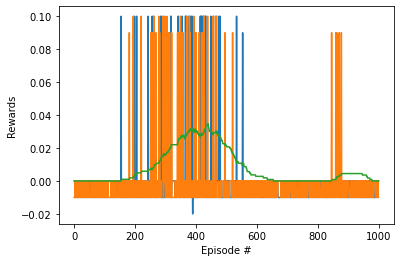

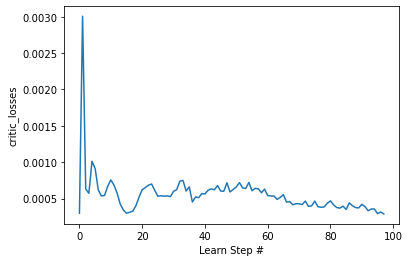

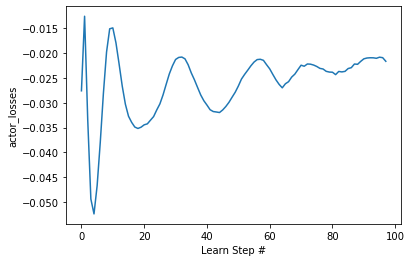

-------------------------------------
-------------------------------------
Summary :
-------------------------------------
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.4
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain


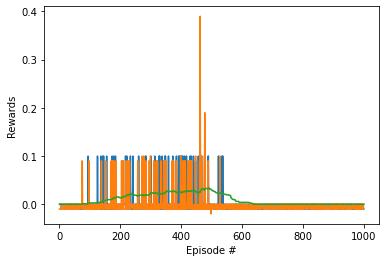

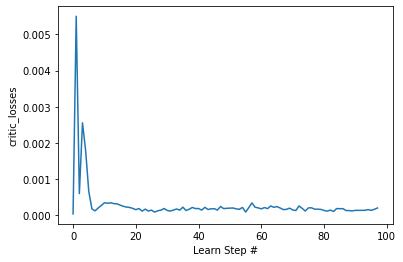

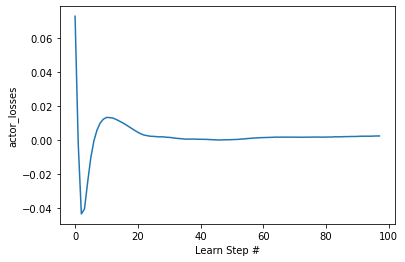

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.4
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


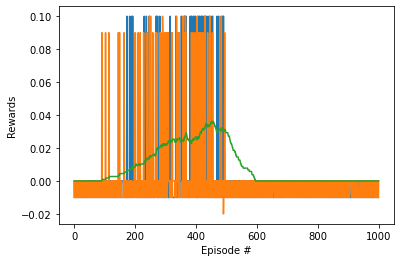

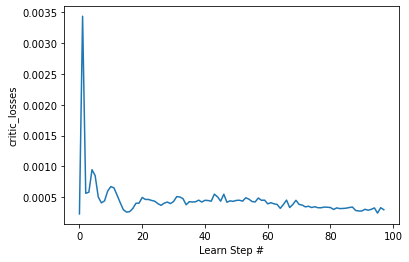

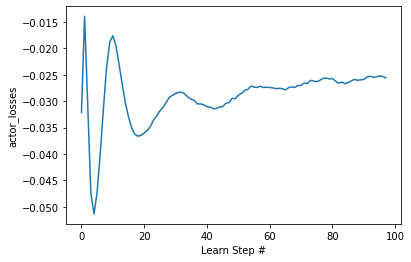

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.4
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain


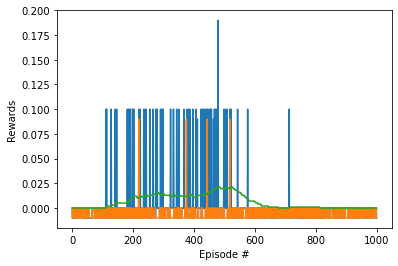

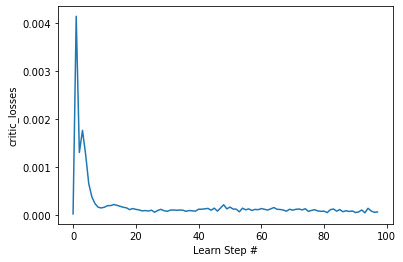

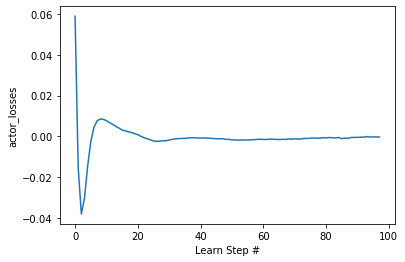

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.4
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


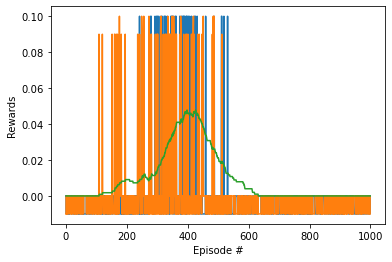

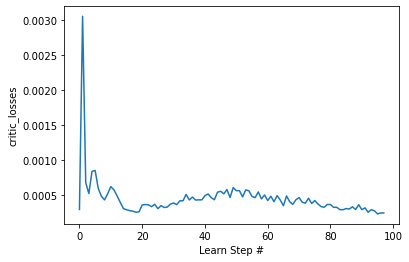

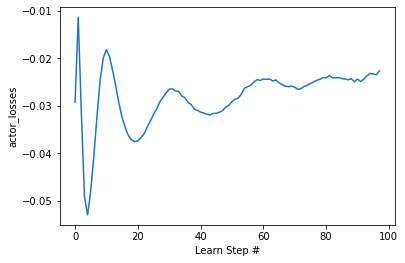

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.6
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain


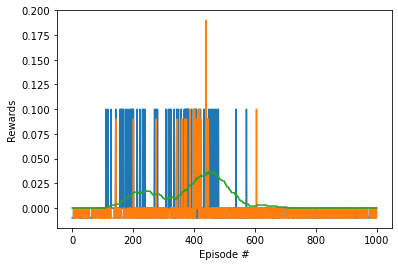

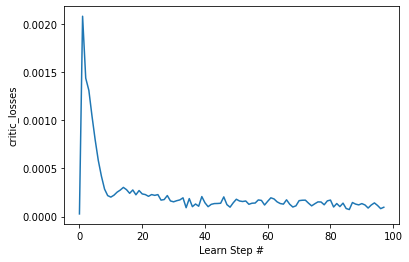

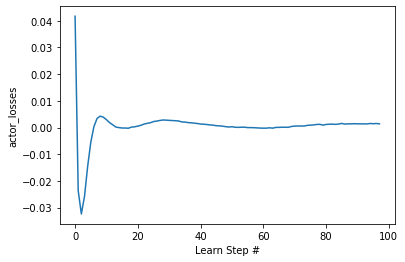

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.4
beta                 : 0.6
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


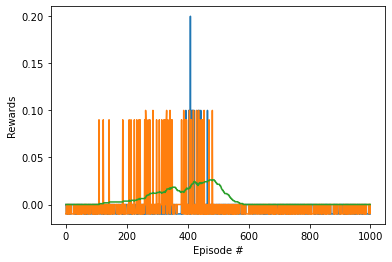

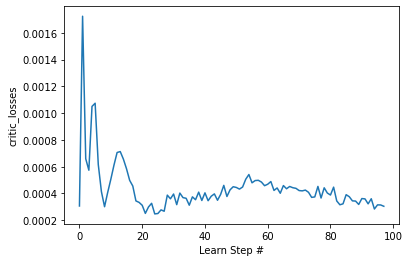

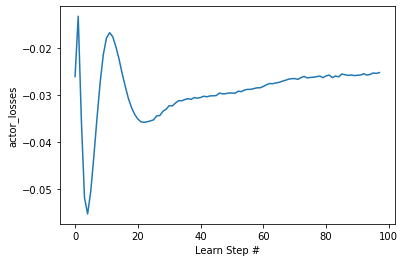

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.5
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain


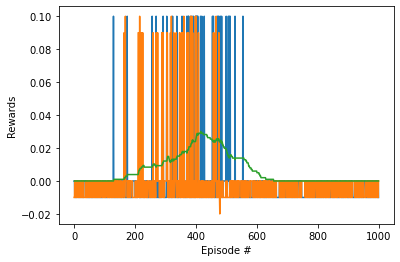

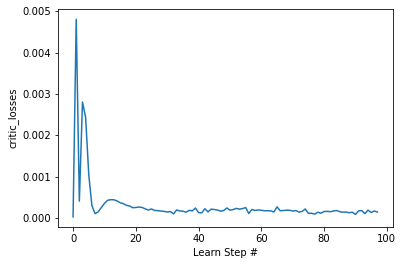

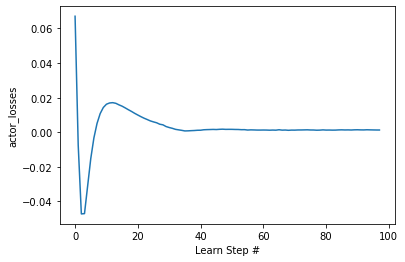

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.5
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


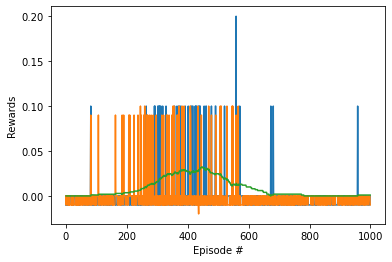

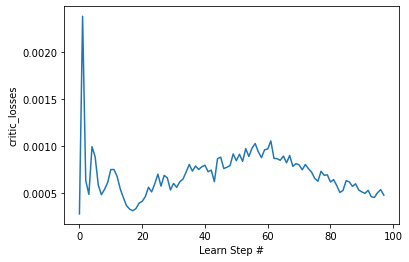

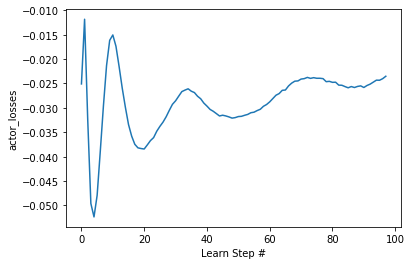

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.7
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain


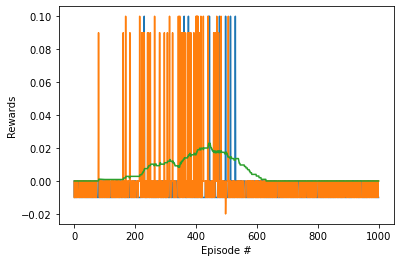

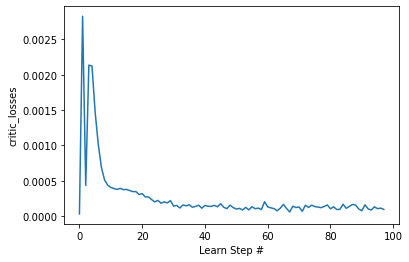

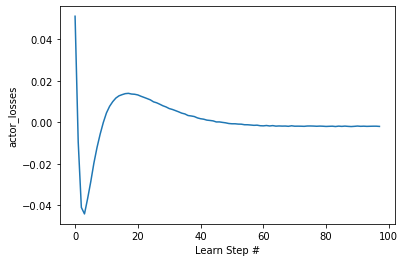

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.5
beta                 : 0.7
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


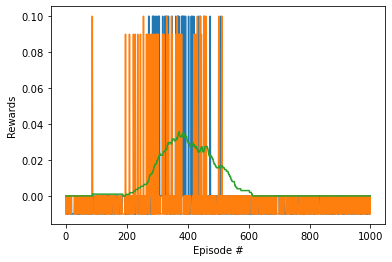

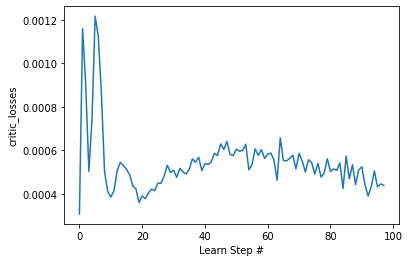

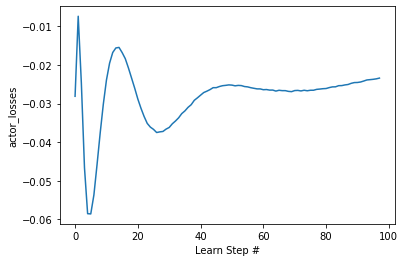

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.4
dropout              : 0.01
seed                 : 228
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain


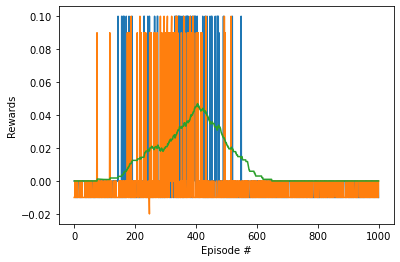

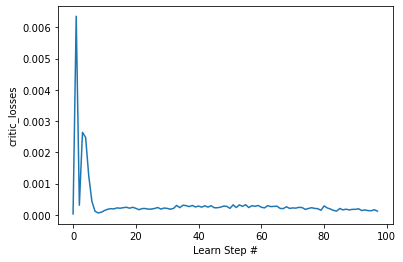

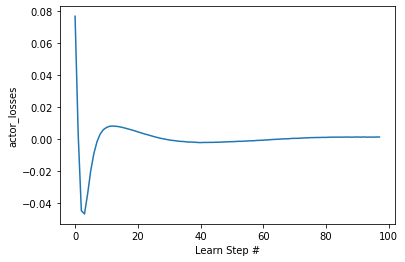

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 512
buffer_size          : 50000
batch_size           : 512
alpha                : 0.7
beta                 : 0.4
dropout              : 0.01
seed                 : 230
max_episodes         : 1000
learn_every          : 10
joined_states        : True
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.998
sigma                : 0.15
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
emin                 : 0.0001


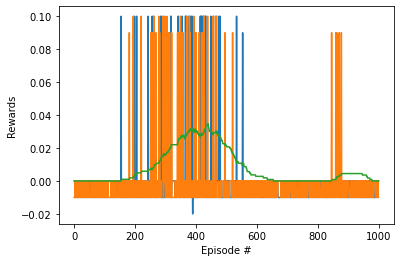

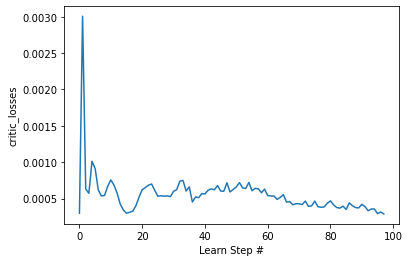

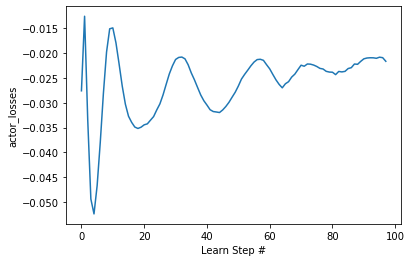

In [6]:
from maddpg import maddpg
import cProfile
DoProfile = False

config = {
    'gamma'               : 0.99,
    'tau'                 : 0.01,
    'action_size'         : action_size,
    'state_size'          : state_size,
    'hidden_size'         : 512,
    'buffer_size'         : 50000,
    'batch_size'          : 512,
    'alpha'               : 0.6,
    'beta'                : 0.5,
    'dropout'             : 0.01,
    'seed'                : 226,
    'max_episodes'        : 1000,
    'learn_every'         : 10,
    'joined_states'       : True,
    'critic_learning_rate': 1e-3,
    'actor_learning_rate' : 1e-3,
    'noise_decay'         : 0.998,
    'sigma'               : 0.15,
    'num_agents'          : num_agents,
    'env_file_name'       : env_file_name,
    'train_mode'          : True,
    'brain_name'          : brain_name}

def print_config(config):
    print('Config Parameters    : ')
    for c,k in config.items():
        print('{:20s} : {}'.format(c,k))

config_list = []
result_list = []
var_range = []
# alpha = [0.4, 0.5, 0.6]
# beta = [0.4, 0.5, 0.6]
# for a in alpha:
#     for b in beta:
#         var_range.append([a,b])
var_range = [[0.4,0.4],[0.5,0.4],[0.4,0.6],[0.7,0.5],[0.5,0.7],[0.7,0.4]]
selected_seeds = [228,230]
#  = 5
for param in range(len(var_range)):
    alt_config = config.copy()
    # alt_config['sigma'] = var_range[param]
    # alt_config['noise_decay'] = var_range[param]
    alt_config['alpha'] = var_range[param][0]
    alt_config['beta'] = var_range[param][1]
    # alt_config['actor_learning_rate'] = var_range[param]
    # alt_config['tau'] = config['tau']*curmult
    # alt_config['critic_learning_rate'] = config['critic_learning_rate']*curmult
    # alt_config['actor_learning_rate'] = config['actor_learning_rate']*curmult
    num_runs = len(selected_seeds)
    for main in range(num_runs):#len(tau_range)):
        print('-------------------------------------')
        print('New Run :')
        print('-------------------------------------')
        # alt_config['seed'] += 1
        alt_config['seed'] = selected_seeds[main]
        print_config(alt_config)
        config_list.append(alt_config.copy())
        agent = maddpg(env, alt_config)
        if DoProfile:cProfile.run("results = agent.train()",'PerfStats')
        else:results = agent.train()
        result_list.append(results)
        # all_rewards,avg_rewards,critic_losses,actor_losses = agent.train()
        print_config(alt_config)
        plot_results(results)
print('-------------------------------------')
print('-------------------------------------')
print('Summary :')
print('-------------------------------------')
print('-------------------------------------')
for param in range(len(var_range)):
    for main in range(num_runs):
        print_config(config_list[param*num_runs+main])
        plot_results(result_list[param*num_runs+main])
    
env.close()

# 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```